In [5]:
import numpy as np
from OABS_vertex_calc import *
import time
import matplotlib.pyplot as plt
import matplotlib.patches
import seaborn as sns
import scipy as sp
from matplotlib.colors import LogNorm

# binding map

In [340]:
n_bind = 2 #types of proteins/marks
e_m = np.array([1.52, 1.52]) #binding energy FOR F_BIND_ALT
v_int =  np.array([[-4, 4], [4, -4]])
phi_p = 0.7
M = 50
nm = M
pa_vec = np.arange(0, nm, 1) / (nm-1)
pb_vec = 1-pa_vec
poly_marks = [pa_vec, pb_vec]

# # zoomed
# mu_max_1 = -2#8#0.1 #10
# mu_min_1 = -4#-9
# del_mu_1 = .1#.5 #0.25
# mu_max_2 = mu_max_1
# mu_min_2 = mu_min_1
# del_mu_2 = del_mu_1

# vryzmd
mu_max_1 = -2.6#8#0.1 #10
mu_min_1 = -3#-9
del_mu_1 = .1#.5 #0.25
mu_max_2 = mu_max_1
mu_min_2 = mu_min_1
del_mu_2 = del_mu_1

# # bcczoom
# mu_max_1 = -2.8299#8#0.1 #10
# mu_min_1 = -2.87#-9
# del_mu_1 = .001#.5 #0.25
# mu_max_2 = -2.899
# mu_min_2 = -2.95
# del_mu_2 = del_mu_1

# # tipzoom
# mu_max_1 = -2.849#8#0.1 #10
# mu_min_1 = -2.95#-9
# del_mu_1 = .0025#.5 #0.25
# mu_max_2 = mu_max_1
# mu_min_2 = mu_min_1
# del_mu_2 = del_mu_1

# vryzmd
mu_max_1 = -0#8#0.1 #10
mu_min_1 = -5#-9
del_mu_1 = .1#.5 #0.25
mu_max_2 = mu_max_1
mu_min_2 = mu_min_1
del_mu_2 = del_mu_1

# mu_max_1 = -2.934#8#0.1 #10
# mu_min_1 = -2.935#-9
# del_mu_1 = 1#.5 #0.25
# mu_max_2 = -2.864
# mu_min_2 = -2.880
# del_mu_2 = 0.005

mu1_arr = np.arange(mu_min_1, mu_max_1, del_mu_1)
mu2_arr = np.arange(mu_min_2, mu_max_2, del_mu_2)
v_s = 1
v_m = 1
N = 5000
b = 1

psol = Polymer_soln(n_bind, v_int, e_m, phi_p, poly_marks, mu1_arr, mu2_arr, v_s, v_m, N, b)

competitive = True

klog_min = -2.5
klog_max = -.1
klog_num = 30
k_vec = np.logspace(klog_min, klog_max, klog_num) / b

In [342]:
s_bind_A_ALL, s_bind_B_ALL = calc_binding_states(psol)

In [344]:
#REAL
fa_mat = np.zeros((len(mu1_arr), len(mu2_arr))) - 1
fb_mat = np.zeros((len(mu1_arr), len(mu2_arr))) - 1
fab_mat = np.zeros((len(mu1_arr), len(mu2_arr))) - 1
fo_mat = np.zeros((len(mu1_arr), len(mu2_arr))) - 1

for i, mu1 in enumerate(mu1_arr[:]):
    for j, mu2 in enumerate(mu2_arr[:]):
        s_Abnd_ar = s_bind_A_ALL[i,j]
        s_Bbnd_ar = s_bind_B_ALL[i,j]
        f_a, f_b, f_ab, f_o = calc_fas(s_Abnd_ar, s_Bbnd_ar)
        fa_mat[i,j] = f_a
        fb_mat[i,j] = f_b
        fab_mat[i,j] = f_ab
        fo_mat[i,j] = f_o

<Figure size 640x480 with 0 Axes>

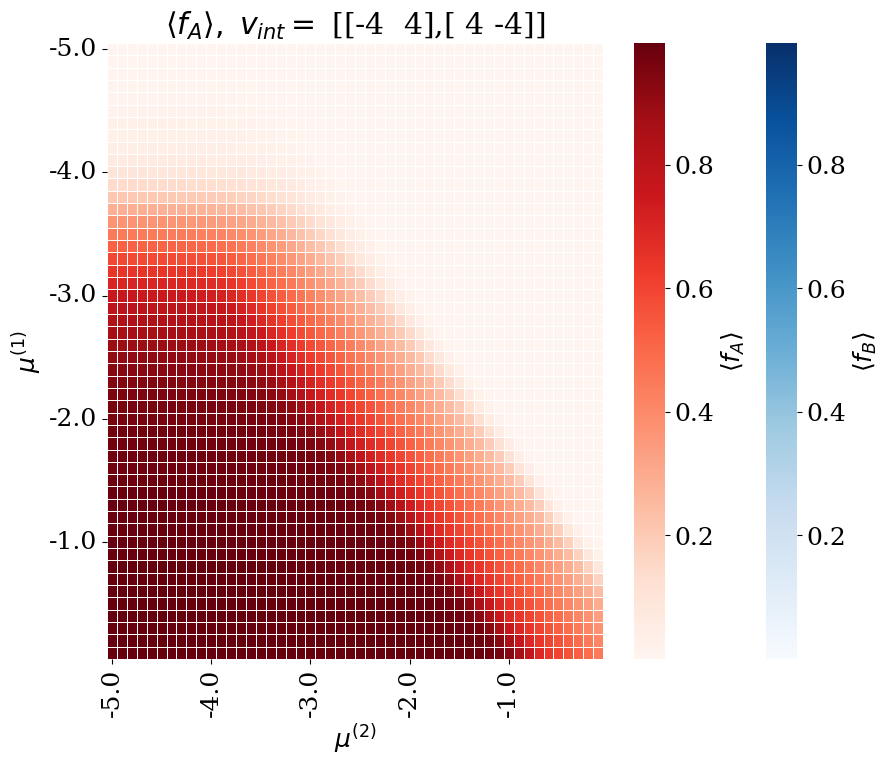

In [372]:
#density maps
fig = plt.figure()
plt.figure(figsize=(10,8))

font = {'family' : 'serif',
        'weight':'normal',
        'size': 18}
plt.rc('font', **font)

# f_gam_soln_arr = density_maps
mu2_array = np.round(mu2_arr,2)
mu1_array = np.round(mu1_arr,2)

# #protein 1
ax = sns.heatmap(fb_mat, linewidth=0.5, cmap = "Blues", xticklabels=mu2_array, yticklabels=mu1_array, cbar_kws={'label':  r'$ \langle f_B \rangle $'}, alpha = 0.5)

ax = sns.heatmap(fa_mat, linewidth=0.5, cmap = "Reds", xticklabels=mu2_array, yticklabels=mu1_array, cbar_kws={'label':  r'$ \langle f_A \rangle $'}, alpha = 0.5)

spacing = 10
ax.set_xticks(ax.get_xticks()[::spacing])
ax.set_xticklabels(mu2_array[::spacing])
ax.set_yticks(ax.get_yticks()[::spacing])
ax.set_yticklabels(mu1_array[::spacing])

# ax.axhline(y=47, linewidth=4, color="black", linestyle = "--")

plt.ylabel("$\mu^{(1)}$")
plt.xlabel("$\mu^{(2)}$")
# plt.title(r"$ \langle f^{(1)} \rangle $" +  ", $e_B^{(1)} = $" + \
#           str(e_m[0]) + ", $e_B^{(2)} = $" + str(e_m[1]) \
#           +  " $v_{int} = $ [" + str(v_int[0]) + "," + str(v_int[1]) + "]")
plt.title(r"$ \langle f_A \rangle, $"  \
          +  " $v_{int} = $ [" + str(v_int[0]) + "," + str(v_int[1]) + "]")

plt.show()

In [368]:
# #density maps
# fig = plt.figure()
# plt.figure(figsize=(10,8))

# font = {'family' : 'serif',
#         'weight':'normal',
#         'size': 18}
# plt.rc('font', **font)

# # f_gam_soln_arr = density_maps
# mu2_array = np.round(mu2_arr,2)
# mu1_array = np.round(mu1_arr,2)
# _, ax = plt.subplots()
# # #protein 1
# sns.heatmap(fb_mat, ax=ax, linewidth=0.5, cmap = "Blues", xticklabels=mu2_array, yticklabels=mu1_array, cbar_kws={'label':  r'$ \langle f_B \rangle $'}, alpha = 0.5)

# sns.heatmap(fa_mat, ax = ax, linewidth=0.5, cmap = "Reds", xticklabels=mu2_array, yticklabels=mu1_array, cbar_kws={'label':  r'$ \langle f_A \rangle $'}, alpha = 0.5)

# spacing = 10
# ax.set_xticks(ax.get_xticks()[::spacing])
# ax.set_xticklabels(mu2_array[::spacing])
# ax.set_yticks(ax.get_yticks()[::spacing])
# ax.set_yticklabels(mu1_array[::spacing])

# # ax.axhline(y=47, linewidth=4, color="black", linestyle = "--")

# plt.ylabel("$\mu^{(1)}$")
# plt.xlabel("$\mu^{(2)}$")
# # plt.title(r"$ \langle f^{(1)} \rangle $" +  ", $e_B^{(1)} = $" + \
# #           str(e_m[0]) + ", $e_B^{(2)} = $" + str(e_m[1]) \
# #           +  " $v_{int} = $ [" + str(v_int[0]) + "," + str(v_int[1]) + "]")
# plt.title(r"$ \langle f_A \rangle, $"  \
#           +  " $v_{int} = $ [" + str(v_int[0]) + "," + str(v_int[1]) + "]")

# plt.show()

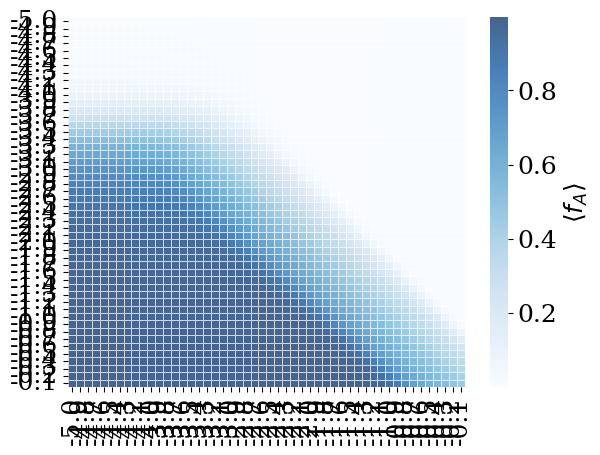

In [370]:
ax = sns.heatmap(fa_mat, linewidth=0.5, cmap = "Blues", xticklabels=mu2_array, yticklabels=mu1_array, cbar_kws={'label':  r'$ \langle f_A \rangle $'}, alpha = 0.75)


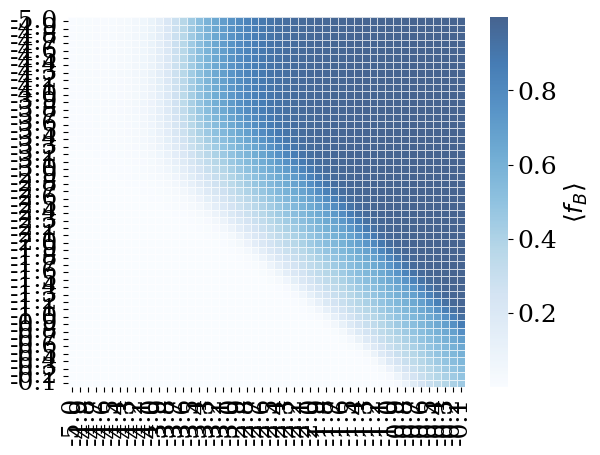

In [354]:
ax = sns.heatmap(fb_mat, linewidth=0.5, cmap = "Blues", xticklabels=mu2_array, yticklabels=mu1_array, cbar_kws={'label':  r'$ \langle f_B \rangle $'}, alpha = 0.75)


<Figure size 640x480 with 0 Axes>

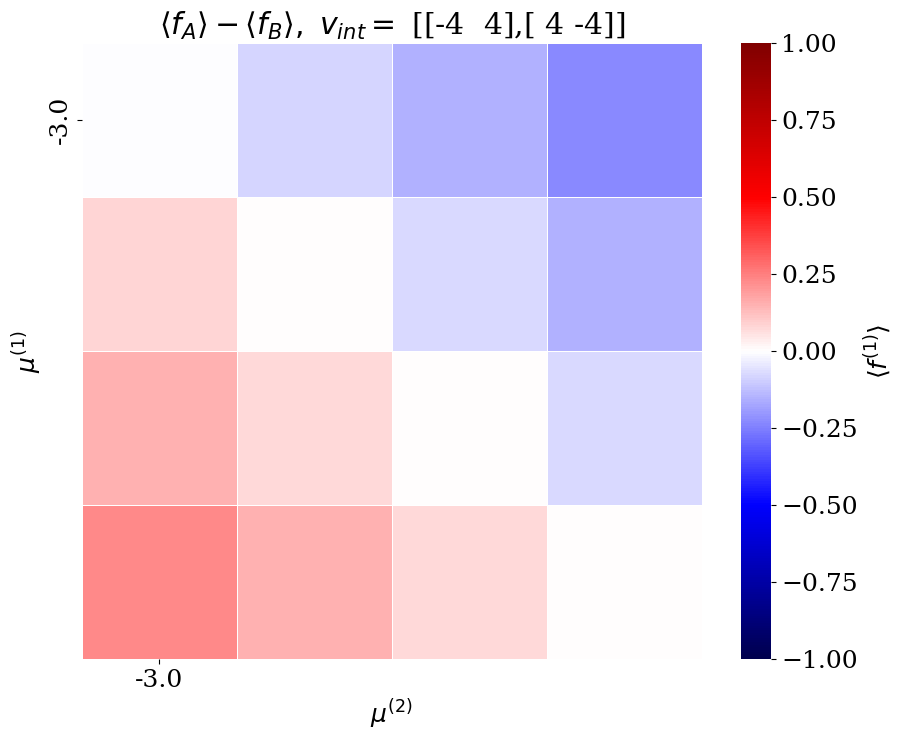

In [310]:
#density maps
fig = plt.figure()
plt.figure(figsize=(10,8))

font = {'family' : 'serif',
        'weight':'normal',
        'size': 18}
plt.rc('font', **font)

# f_gam_soln_arr = density_maps
mu2_array = np.round(mu2_arr,2)
mu1_array = np.round(mu1_arr,2)
# #protein 1
ax = sns.heatmap(fa_mat-fb_mat, linewidth=0.5, cmap = "seismic", xticklabels=mu2_array, yticklabels=mu1_array,\
                 cbar_kws={'label':  r'$ \langle f^{(1)} \rangle $'},  vmin=-1, vmax=1)
# ax.set_xticks(ax.get_xticks()[::2])
# ax.set_xticklabels(mu2_array[::2].astype(np.int64))
# ax.set_yticks(ax.get_yticks()[::2])
# ax.set_yticklabels(mu1_array[::2].astype(np.int64))

spacing = 5
ax.set_xticks(ax.get_xticks()[::spacing])
ax.set_xticklabels(mu2_array[::spacing])
ax.set_yticks(ax.get_yticks()[::spacing])
ax.set_yticklabels(mu1_array[::spacing])

ax.axhline(y=47, linewidth=4, color="black", linestyle = "--")

plt.ylabel("$\mu^{(1)}$")
plt.xlabel("$\mu^{(2)}$")
# plt.title(r"$ \langle f^{(1)} \rangle $" +  ", $e_B^{(1)} = $" + \
#           str(e_m[0]) + ", $e_B^{(2)} = $" + str(e_m[1]) \
#           +  " $v_{int} = $ [" + str(v_int[0]) + "," + str(v_int[1]) + "]")
plt.title(r"$ \langle f_A \rangle -  \langle f_B \rangle, $"  \
          +  " $v_{int} = $ [" + str(v_int[0]) + "," + str(v_int[1]) + "]")

plt.show()

# phase diagram

## phase boundaries

In [6]:
# vryzmd

n_bind = 2 #types of proteins/marks
e_m = np.array([1.52, 1.52]) #binding energy FOR F_BIND_ALT
v_int =  np.array([[-4, 4], [4, -4]])
phi_p = 0.7
M = 50
nm = M
pa_vec = np.arange(0, nm, 1) / (nm-1)
pb_vec = 1-pa_vec
poly_marks = [pa_vec, pb_vec]

# vryzmd
mu_max_1 = -2.6#8#0.1 #10
mu_min_1 = -3#-9
del_mu_1 = .01#.5 #0.25
mu_max_2 = mu_max_1
mu_min_2 = mu_min_1
del_mu_2 = del_mu_1

# mu_max_1 = -3.099#8#0.1 #10
# mu_min_1 = -3.1#-9
# del_mu_1 = .01#.5 #0.25
# mu_max_2 = -3.699
# mu_min_2 = -3.7
# del_mu_2 = del_mu_1

mu1_arr = np.arange(mu_min_1, mu_max_1, del_mu_1)
mu2_arr = np.arange(mu_min_2, mu_max_2, del_mu_2)
v_s = 1
v_m = 1
N = 5000
b = 1

psol = Polymer_soln(n_bind, v_int, e_m, phi_p, poly_marks, mu1_arr, mu2_arr, v_s, v_m, N, b)

competitive = True

klog_min = -2.5
klog_max = -.1
klog_num = 30
k_vec = np.logspace(klog_min, klog_max, klog_num) / b

N = 5000
phi_p = 0.7
chi_AB_loaded = 13 / (phi_p * N)
phases = np.load("OABS_phases_arr_vryzmd_chiABphipNeq13N=5000.npy")
minF_arr = np.load("OABS_min_F_arr_vryzmd_chiABphipNeq13N=5000.npy")

# N = 5000
# phi_p = 0.7
# chi_AB_loaded = 13 / (phi_p * N)
# phases = np.load("OABS_phases_arr_eigvecrest_vryzmd_chiABphipNeq13N=5000.npy")
# minF_arr = np.load("OABS_min_F_arr_eigvecrest_vryzmd_chiABphipNeq13N=5000.npy")

# N = 5000
# phi_p = 0.7
# chi_AB_loaded = 13 / (phi_p * N)
# phases = np.load("OABS_phases_arr_physbound_vryzmd_chiABphipNeq13N=5000.npy")
# minF_arr = np.load("OABS_min_F_arr_physbound_vryzmd_chiABphipNeq13N=5000.npy")


# N = 50000
# phi_p = 0.7
# chi_AB_loaded = 13 / (phi_p * N)
# phases = np.load("OABS_phases_arr_vryzmd_chiABphipNeq12N=50000.npy")
# minF_arr = np.load("OABS_min_F_arr_vryzmd_chiABphipNeq12N=50000.npy")

Text(0.5, 1.0, '$OABS \\ phases, $N = 5000,  $N \\phi_p \\chi_{AB} = $13.0, $N\\chi_{OS} = N\\chi_{AS} = N\\chi_{BS} =$0, $v_{int} = $ [[-4  4],[ 4 -4]]\n')

<Figure size 640x480 with 0 Axes>

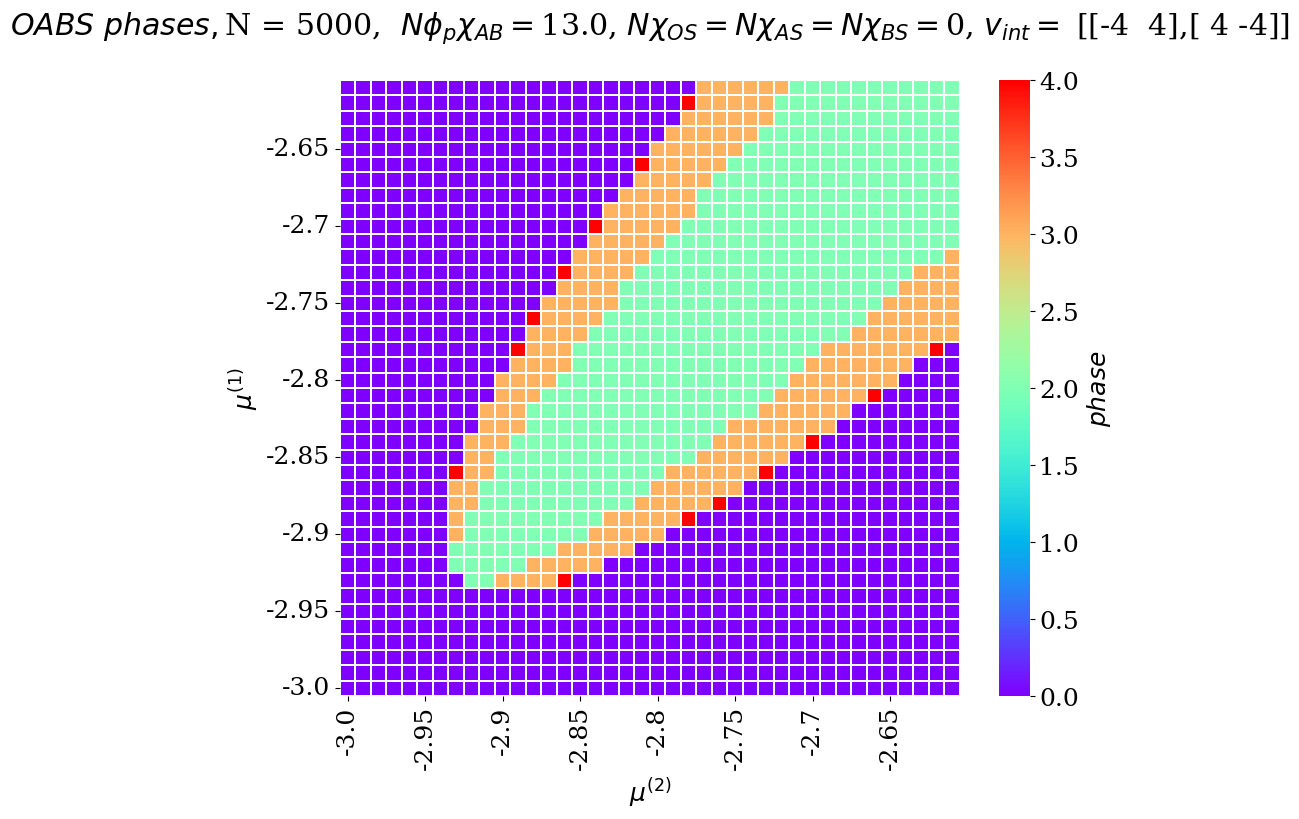

In [9]:
err = np.sum(phases < 0)
if err > 0 :
    raise Exception("IVALID!!")
    
fig = plt.figure()
plt.figure(figsize=(10,8))

font = {'family' : 'serif',
        'weight':'normal',
        'size': 18}
plt.rc('font', **font)


min_ind = 0
max_ind = -1

mu1_array = np.round(mu1_arr, 2)
mu2_array = np.round(mu2_arr, 2)
# plt.scatter(mu1_array[np.where(multi_soln_mus == 1)[0]],mu2_array[np.where(multi_soln_mus == 1)[1]])
# k_ind = 20
#     poly_fluc = min_eigvec_arr_allk[:,:,0]
#     poly_fluc[np.where(np.sign(min_eigval_arr_allk) == 1) ] = 0

#     prot1_fluc = min_eigvec_arr_allk[:,:,1]
#     prot1_fluc[np.where(np.sign(min_eigval_arr_allk) == 1) ] = 0

#     prot2_fluc = min_eigvec_arr_allk[:,:,2]
#     prot2_fluc[np.where(np.sign(min_eigval_arr_allk) == 1) ] = 0
    
# k_star_arr_DENS[np.where(np.sign(min_eigval_arr_allk_DENS) == 1) ] = np.nan
# ax = sns.heatmap(1/(k_star_arr*b), linewidth=0.25, cmap = "cool", xticklabels=mu2_array, yticklabels=mu1_array, cbar_kws={'label':  r"$ \frac{1}{k^*} \ (nm)$"})
ax = sns.heatmap(phases, linewidth=0.25, cmap = "rainbow", xticklabels=mu2_array, yticklabels=mu1_array,\
                 cbar_kws={'label':  r"$phase$"}, vmin=0, vmax=4)

spacing = 5
ax.set_xticks(ax.get_xticks()[::spacing])
ax.set_xticklabels(mu2_array[::spacing])#.astype(np.int64))
ax.set_yticks(ax.get_yticks()[::spacing])
ax.set_yticklabels(mu2_array[::spacing])#.astype(np.int64))
ax.invert_yaxis()
plt.ylabel("$\mu^{(1)}$")
plt.xlabel("$\mu^{(2)}$")
plt.title(r"$OABS \ phases, $" +  "N = %s, " % N + " $N \phi_p \chi_{AB} = $" + \
          str(chi_AB_loaded*N*phi_p) \
          + ", $N\chi_{OS} = N\chi_{AS} = N\chi_{BS} =$" + str(N*0)  
          +  ", $v_{int} = $ [" + str(v_int[0]) + "," + str(v_int[1]) + "]" +\
          "\n")

# plt.savefig('OABS_phases.png')

In [11]:
cyl_phases_shift = np.copy(phases)
cyl_phases_shift[np.where(phases!=3)] = -1

X = cyl_phases_shift

upper = np.triu(X)
upper[np.where(upper == 0)] = -1

lower = np.tril(X)
lower[np.where(lower == 0)] = -1

In [35]:
# # old original
# # find boundaries of cylindrical phase
# cyl_right_inner = np.zeros((phases.shape[0],2))
# cyl_right_outer = np.zeros((phases.shape[0],2))

# cyl_left_inner = np.zeros((phases.shape[0],2))
# cyl_left_outer = np.zeros((phases.shape[0],2))

# for i in range(phases.shape[0]): # for each row in diagram
#     #find crossover arr
#     mu1 = mu1_arr[i]

#     # print("mu1: ", mu1)
#     # first look at upper triangle of matrix, to find boundaires of right diag
#     a = upper[i]
#     asign = np.sign(a)
    
#     signchange = ((np.roll(asign, 1) - asign) != 0).astype(int)
#     signchange[0] = 0
#     # print(signchange)
#     if np.sum(signchange) == 0:
#         mu2_vals = [np.nan]
#         cyl_right_inner[i] = [mu1, mu2_vals[0]]
#         cyl_right_outer[i] = [mu1, mu2_vals[0]] 

#     elif np.sum(signchange) == 1: # outer boundary cut off
#         mu2_vals = mu2_array[np.where(signchange==1)]
#         cyl_right_inner[i] = [mu1, mu2_vals[0]]
#         cyl_right_outer[i] = [mu1, np.nan] 

#     else:
#         mu2_vals = mu2_array[np.where(signchange==1)]
#         cyl_right_inner[i] = [mu1, np.min(mu2_vals)]
#         cyl_right_outer[i] = [mu1, np.max(mu2_vals)] 

#     # same analysis for lower diagonal
#     a = lower[i]
#     asign = np.sign(a)
#     signchange = ((np.roll(asign, 1) - asign) != 0).astype(int)
#     signchange[0] = 0
#     if np.sum(signchange) == 0:
#         mu2_vals = [np.nan]
#         cyl_left_inner[i] = [mu1, np.max(mu2_vals)]
#         cyl_left_outer[i] = [mu1, np.min(mu2_vals)]
#     elif np.sum(signchange) == 1: # outer boundary cut off
#         mu2_vals = mu2_array[np.where(signchange==1)]
#         cyl_left_inner[i] = [mu1, mu2_vals[0]]
#         cyl_left_outer[i] = [mu1, np.nan] 

#     else:
#         mu2_vals = mu2_array[np.where(signchange==1)]
#         cyl_left_inner[i] = [mu1, np.max(mu2_vals)]
#         cyl_left_outer[i] = [mu1, np.min(mu2_vals)]


# # a = cyl_right_inner
# # remove nan values, where there is no boundary

# cyl_right_inner = cyl_right_inner[~np.isnan(cyl_right_inner).any(axis=1)]    
# cyl_right_outer = cyl_right_outer[~np.isnan(cyl_right_outer).any(axis=1)]    

# cyl_left_inner = cyl_left_inner[~np.isnan(cyl_left_inner).any(axis=1)]    
# cyl_left_outer = cyl_left_outer[~np.isnan(cyl_left_outer).any(axis=1)]  

In [51]:
# COLUMN SCAN
# find boundaries of cylindrical phase
cyl_right_inner = np.zeros((phases.shape[0],2))
cyl_right_outer = np.zeros((phases.shape[0],2))

cyl_left_inner = np.zeros((phases.shape[0],2))
cyl_left_outer = np.zeros((phases.shape[0],2))

for i in range(phases.shape[0]): # for each row in diagram
    #find crossover arr
    mu1 = mu1_arr[i]

    # print("mu1: ", mu1)
    # first look at upper triangle of matrix, to find boundaires of right diag
    a = upper[i]
    asign = np.sign(a)
    
    signchange = ((np.roll(asign, 1) - asign) != 0).astype(int)
    signchange[0] = 0
    # print(signchange)
    if np.sum(signchange) == 0:
        mu2_vals = [np.nan]
        cyl_right_inner[i] = [mu1, mu2_vals[0]]
        cyl_right_outer[i] = [mu1, mu2_vals[0]] 

    elif np.sum(signchange) == 1: # outer boundary cut off
        mu2_vals = mu2_array[np.where(signchange==1)]
        cyl_right_inner[i] = [mu1, mu2_vals[0]]
        cyl_right_outer[i] = [mu1, np.nan] 

    else:
        mu2_vals = mu2_array[np.where(signchange==1)]
        cyl_right_inner[i] = [mu1, np.min(mu2_vals)]
        cyl_right_outer[i] = [mu1, np.max(mu2_vals)] 

    # same analysis for lower diagonal
    a = lower[:,i]
    mu2 = mu2_arr[i]

    asign = np.sign(a)
    signchange = ((np.roll(asign, 1) - asign) != 0).astype(int)
    signchange[0] = 0
    if np.sum(signchange) == 0:
        mu1_vals = [np.nan]
        cyl_left_inner[i] = [np.max(mu1_vals), mu2]
        cyl_left_outer[i] = [np.min(mu1_vals), mu2]
    elif np.sum(signchange) == 1: # outer boundary cut off
        mu1_vals = mu1_array[np.where(signchange==1)]
        cyl_left_inner[i] = [mu1_vals[0], mu2]
        cyl_left_outer[i] = [np.nan, mu2] 

    else:
        mu1_vals = mu1_array[np.where(signchange==1)]
        cyl_left_inner[i] = [np.min(mu1_vals), mu2]
        cyl_left_outer[i] = [np.max(mu1_vals), mu2]


# a = cyl_right_inner
# remove nan values, where there is no boundary

cyl_right_inner = cyl_right_inner[~np.isnan(cyl_right_inner).any(axis=1)]    
cyl_right_outer = cyl_right_outer[~np.isnan(cyl_right_outer).any(axis=1)]    

cyl_left_inner = cyl_left_inner[~np.isnan(cyl_left_inner).any(axis=1)]    
cyl_left_outer = cyl_left_outer[~np.isnan(cyl_left_outer).any(axis=1)]  

In [51]:
# COLUMN SCAN
# find boundaries of cylindrical phase
cyl_right_inner = np.zeros((phases.shape[0],2))
cyl_right_outer = np.zeros((phases.shape[0],2))

cyl_left_inner = np.zeros((phases.shape[0],2))
cyl_left_outer = np.zeros((phases.shape[0],2))

for i in range(phases.shape[0]): # for each row in diagram
    #find crossover arr
    mu1 = mu1_arr[i]

    # print("mu1: ", mu1)
    # first look at upper triangle of matrix, to find boundaires of right diag
    a = upper[i]
    asign = np.sign(a)
    
    signchange = ((np.roll(asign, 1) - asign) != 0).astype(int)
    signchange[0] = 0
    # print(signchange)
    if np.sum(signchange) == 0:
        mu2_vals = [np.nan]
        cyl_right_inner[i] = [mu1, mu2_vals[0]]
        cyl_right_outer[i] = [mu1, mu2_vals[0]] 

    elif np.sum(signchange) == 1: # outer boundary cut off
        mu2_vals = mu2_array[np.where(signchange==1)]
        cyl_right_inner[i] = [mu1, mu2_vals[0]]
        cyl_right_outer[i] = [mu1, np.nan] 

    else:
        mu2_vals = mu2_array[np.where(signchange==1)]
        cyl_right_inner[i] = [mu1, np.min(mu2_vals)]
        cyl_right_outer[i] = [mu1, np.max(mu2_vals)] 

    # same analysis for lower diagonal
    a = lower[:,i]
    mu2 = mu2_arr[i]

    asign = np.sign(a)
    signchange = ((np.roll(asign, 1) - asign) != 0).astype(int)
    signchange[0] = 0
    if np.sum(signchange) == 0:
        mu1_vals = [np.nan]
        cyl_left_inner[i] = [np.max(mu1_vals), mu2]
        cyl_left_outer[i] = [np.min(mu1_vals), mu2]
    elif np.sum(signchange) == 1: # outer boundary cut off
        mu1_vals = mu1_array[np.where(signchange==1)]
        cyl_left_inner[i] = [mu1_vals[0], mu2]
        cyl_left_outer[i] = [np.nan, mu2] 

    else:
        mu1_vals = mu1_array[np.where(signchange==1)]
        cyl_left_inner[i] = [np.min(mu1_vals), mu2]
        cyl_left_outer[i] = [np.max(mu1_vals), mu2]


# a = cyl_right_inner
# remove nan values, where there is no boundary

cyl_right_inner = cyl_right_inner[~np.isnan(cyl_right_inner).any(axis=1)]    
cyl_right_outer = cyl_right_outer[~np.isnan(cyl_right_outer).any(axis=1)]    

cyl_left_inner = cyl_left_inner[~np.isnan(cyl_left_inner).any(axis=1)]    
cyl_left_outer = cyl_left_outer[~np.isnan(cyl_left_outer).any(axis=1)]  

Text(0.5, 0, '$\\mu^{(2)}$')

<Figure size 640x480 with 0 Axes>

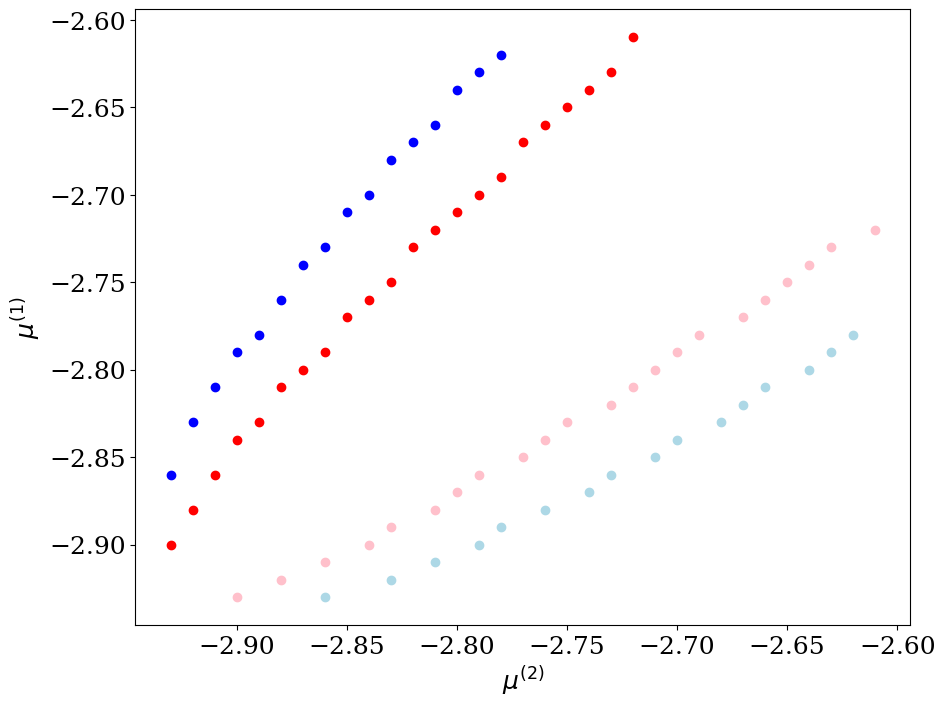

In [53]:
fig = plt.figure()
plt.figure(figsize=(10,8))

font = {'family' : 'serif',
        'weight':'normal',
        'size': 18}
plt.rc('font', **font)


plt.scatter(cyl_right_inner[:,0], cyl_right_inner[:,1], color = "red")
plt.scatter(cyl_right_outer[:,0], cyl_right_outer[:,1], color = "blue")

plt.scatter(cyl_left_inner[:,0], cyl_left_inner[:,1], color = "pink")
plt.scatter(cyl_left_outer[:,0], cyl_left_outer[:,1], color = "lightblue")

plt.ylabel("$\mu^{(1)}$")
plt.xlabel("$\mu^{(2)}$")

In [55]:
cyl_ri_coefs = np.polyfit(cyl_right_inner[:,0], cyl_right_inner[:,1], 2)
cyl_ro_coefs = np.polyfit(cyl_right_outer[:,0], cyl_right_outer[:,1], 2)

cyl_li_coefs = np.polyfit(cyl_left_inner[:,0], cyl_left_inner[:,1], 2)
cyl_lo_coefs = np.polyfit(cyl_left_outer[:,0], cyl_left_outer[:,1], 2)

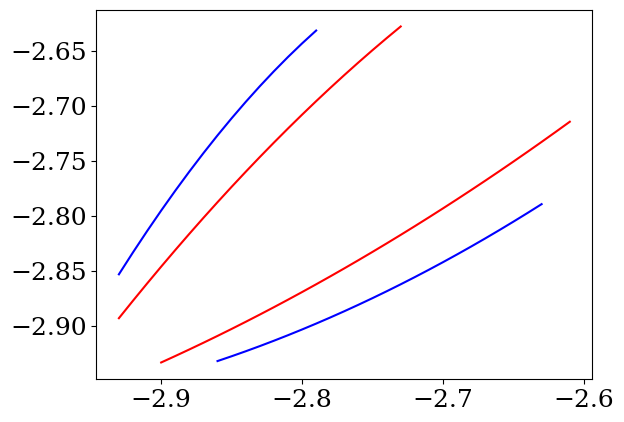

In [57]:
x_fine_ri = np.arange(np.min(cyl_right_inner[:,0]), np.max(cyl_right_inner[:,0]), .01)
x_fine_ro = np.arange(np.min(cyl_right_outer[:,0]), np.max(cyl_right_outer[:,0]), .01)
x_fine_li = np.arange(np.min(cyl_left_inner[:,0]), np.max(cyl_left_inner[:,0]), .01)
x_fine_lo = np.arange(np.min(cyl_left_outer[:,0]), np.max(cyl_left_outer[:,0]), .01)

x_fine2 = np.arange(-3, -2.6, .001)
plt.plot(x_fine_ri, cyl_ri_coefs[0]*x_fine_ri**2 + cyl_ri_coefs[1]*x_fine_ri + cyl_ri_coefs[2], color = "red")
plt.plot(x_fine_ro, cyl_ro_coefs[0]*x_fine_ro**2 + cyl_ro_coefs[1]*x_fine_ro + cyl_ro_coefs[2], color = "blue")
plt.plot(x_fine_li, cyl_li_coefs[0]*x_fine_li**2 + cyl_li_coefs[1]*x_fine_li + cyl_li_coefs[2], color = "red")
plt.plot(x_fine_lo, cyl_lo_coefs[0]*x_fine_lo**2 + cyl_lo_coefs[1]*x_fine_lo + cyl_lo_coefs[2], color = "blue")

# plt.scatter(xs, ys)

## spinodal

### generate spinodal left and right- can skip if loading 

In [107]:
# ultrazmd

n_bind = 2 #types of proteins/marks
e_m = np.array([1.52, 1.52]) #binding energy FOR F_BIND_ALT
v_int =  np.array([[-4, 4], [4, -4]])
phi_p = 0.7
M = 50
nm = M
pa_vec = np.arange(0, nm, 1) / (nm-1)
pb_vec = 1-pa_vec
poly_marks = [pa_vec, pb_vec]

# vryzmd
mu_max_1 = -2.6#8#0.1 #10
mu_min_1 = -3#-9
del_mu_1 = .001#.5 #0.25
mu_max_2 = mu_max_1
mu_min_2 = mu_min_1
del_mu_2 = del_mu_1

# mu_max_1 = -3.099#8#0.1 #10
# mu_min_1 = -3.1#-9
# del_mu_1 = .01#.5 #0.25
# mu_max_2 = -3.699
# mu_min_2 = -3.7
# del_mu_2 = del_mu_1

mu1_arr = np.arange(mu_min_1, mu_max_1, del_mu_1)
mu2_arr = np.arange(mu_min_2, mu_max_2, del_mu_2)
v_s = 1
v_m = 1
N = 5000
b = 1

psol = Polymer_soln(n_bind, v_int, e_m, phi_p, poly_marks, mu1_arr, mu2_arr, v_s, v_m, N, b)

competitive = True

klog_min = -2.5
klog_max = -.1
klog_num = 30
k_vec = np.logspace(klog_min, klog_max, klog_num) / b

N = 5000
phi_p = 0.7
chi_AB_loaded = 13 / (phi_p * N)
phases = np.load("OABS_phases_arr_vryzmd_chiABphipNeq13N=5000.npy")
minF_arr = np.load("OABS_min_F_arr_vryzmd_chiABphipNeq13N=5000.npy")

# N = 5000
# phi_p = 0.7
# chi_AB_loaded = 13 / (phi_p * N)
# phases = np.load("OABS_phases_arr_eigvecrest_vryzmd_chiABphipNeq13N=5000.npy")
# minF_arr = np.load("OABS_min_F_arr_eigvecrest_vryzmd_chiABphipNeq13N=5000.npy")

# N = 5000
# phi_p = 0.7
# chi_AB_loaded = 13 / (phi_p * N)
# phases = np.load("OABS_phases_arr_physbound_vryzmd_chiABphipNeq13N=5000.npy")
# minF_arr = np.load("OABS_min_F_arr_physbound_vryzmd_chiABphipNeq13N=5000.npy")


# N = 50000
# phi_p = 0.7
# chi_AB_loaded = 13 / (phi_p * N)
# phases = np.load("OABS_phases_arr_vryzmd_chiABphipNeq12N=50000.npy")
# minF_arr = np.load("OABS_min_F_arr_vryzmd_chiABphipNeq12N=50000.npy")

In [163]:
# %%time
# s_bind_A_ALL, s_bind_B_ALL = calc_binding_states(psol)

In [111]:
# # %%time
# # k* stability analysis NUMBER DENSITY THEORY
# assert competitive == True
# # chi = 0#5*N/N

# min_eigval_arr = np.zeros((len(mu1_arr[:]), len(mu2_arr[:]), len(k_vec)))

# min_eigval_arr_allk_DENS = np.zeros((len(mu1_arr[:]), len(mu2_arr[:])))
# min_eigval_arr_allk_ps = np.zeros((len(mu1_arr[:]), len(mu2_arr[:])))

# min_eigvec_arr = np.zeros((len(mu1_arr[:]), len(mu2_arr[:]), len(k_vec), 3))
# min_eigvec_arr_allk_DENS = np.zeros((len(mu1_arr[:]), len(mu2_arr[:]), 3))

# k_star_arr_DENS= np.zeros((len(mu1_arr[:]), len(mu2_arr[:]))) 

# cond_num_arr = np.zeros((len(mu1_arr[:]), len(mu2_arr[:]), len(k_vec)))
# max_cond_arr = np.zeros((len(mu1_arr[:]), len(mu2_arr[:])))

# # # PRETTY GOOD but no spinodal, just all macro seps
# # chi_AB = 200 / (rho_p*N) #(v_int[0,1] - 0.5*(v_int[0,0] + v_int[1,1]))*Vol_int/100
# # chi_AS = 910 / N #834 / N


# # # same as above :(
# # chi_AB = 00 / (rho_p*N) #(v_int[0,1] - 0.5*(v_int[0,0] + v_int[1,1]))*Vol_int/100
# # chi_AS = 910 / N #834 / N

# # 
# chi_AB = 13 / (phi_p*N) #(v_int[0,1] - 0.5*(v_int[0,0] + v_int[1,1]))*Vol_int/100
# chi_AS = 00 / N #834 / N
# chis = [chi_AB, chi_AS]
# for i, mu1 in enumerate(mu1_arr):
#     for j, mu2 in enumerate(mu2_arr):
# #         if mu1 == mu2:
# #             continue
#         mu = [mu1, mu2]
#         # print("mu: ", mu)

#         for ik, k in enumerate(k_vec):

#             # S2_mat = (M**2 / N**2) * s2_mats[i][j][ik].copy()
#             # S2_mat[3,3] /= (M**2 / N**2)
#             # print("M2 FACTOR!!!")

            

#             s_bnd_A = s_bind_A_ALL[i, j]
#             s_bnd_B = s_bind_B_ALL[i, j]

#             M2s = calc_mon_mat_2(s_bnd_A, s_bnd_B, competitive)
#             S2_mat = (phi_p / N) * calc_sf2(psol, M2s, [k], competitive)
#             cond_num_arr[i][j][ik] = np.linalg.cond(S2_mat)

#             G2 = gamma2_chis(psol, s_bnd_A, s_bnd_B, k, chis, competitive)

            
#             # s_bnd_A = s_bind_A_ar[i, j]
#             # s_bnd_B = s_bind_B_ar[i, j]

#             # G2 = gamma2(chrom, s_bnd_A, s_bnd_B, k, chi, competitive)

            
#             val, vec = np.linalg.eigh(G2)
#             vec = vec.T
# #                 print(vec)
# #                 print(vec.T)
# #                 print(val)
#             min_val = np.min(val)            
#             min_eigval_arr[i][j][ik] = min_val
#             min_eigvec_arr[i][j][ik] = vec[np.where(val == min_val)]


#         # all-k analysis
#         # min eigvals, eigvecs at given mu1,mu2 for each k        
#         min_vals = min_eigval_arr[i][j][:][np.nonzero(min_eigval_arr[i][j][:])] 
#         min_vecs = min_eigvec_arr[i][j][:][np.nonzero(min_eigval_arr[i][j][:])]

#         # minimum eigenvalue at given mu1,mu2 across all ks
#         minval_allk = np.min(min_vals) 
        
#         # store this eigenvalue and corresponding eigenvector
#         min_eigval_arr_allk_DENS[i][j] = minval_allk 
#         min_eigvec_arr_allk_DENS[i][j] = min_vecs[np.where(min_vals==minval_allk)]

#         k_star = k_vec[np.where(min_vals==minval_allk)]
#         k_star_arr_DENS[i][j] = k_star

#         max_cond_num = np.max(cond_num_arr[i][j][:])#[np.nonzero(min_eigval_arr[i][j][:])] 
#         max_cond_arr[i][j] = max_cond_num
# # setting all non-decomposed/ separated systems to 0 
# poly_fluc = min_eigvec_arr_allk_DENS[:,:,0]
# poly_fluc[np.where(np.sign(min_eigval_arr_allk_DENS) == 1) ] = 0

# prot1_fluc = min_eigvec_arr_allk_DENS[:,:,1]
# prot1_fluc[np.where(np.sign(min_eigval_arr_allk_DENS) == 1) ] = 0

# prot2_fluc = min_eigvec_arr_allk_DENS[:,:,2]
# prot2_fluc[np.where(np.sign(min_eigval_arr_allk_DENS) == 1) ] = 0

# k_star_arr_DENS[np.where(np.sign(min_eigval_arr_allk_DENS) == 1) ] = -1 # unphysical value, to indicate outside of spinodal

In [112]:
k_star_arr_DENS = np.load("spin_kstar_ultrafine_N=5k_XN=13.npy")
min_eigval_arr_allk_DENS = np.load("spin_mineigval_ultrafine_N=5k_XN=13.npy")

<Figure size 640x480 with 0 Axes>

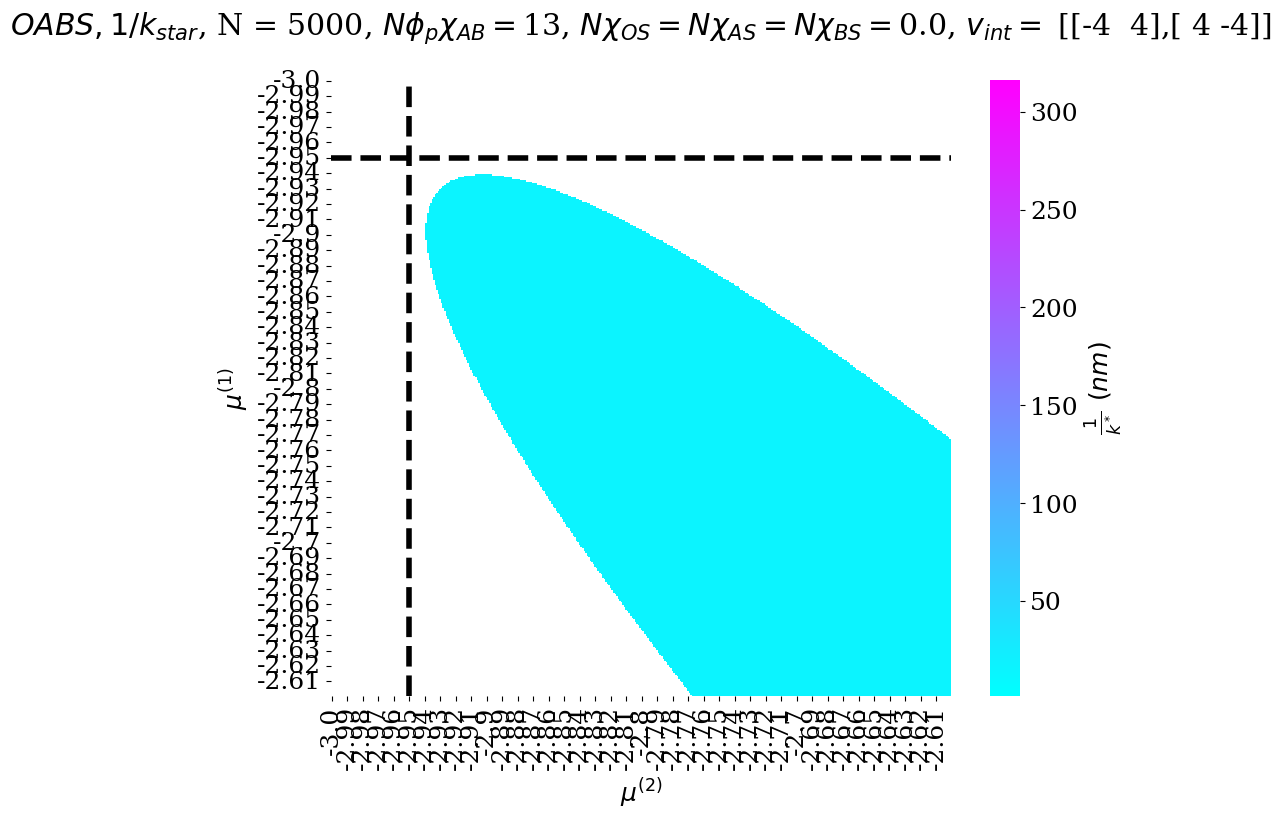

In [113]:
# Explanation: first choose distances. These distances must be in the same units at the persisitnece length due  to exp(xm) term
# in sf calculation. Doesnt matter if used b to scale the lengths used- they are still in nanometers
# then invert these distances to get magnitudes of wavevectors
# then find k star, and invert it to get the critical lengthscale in units of nm


fig = plt.figure()
plt.figure(figsize=(10,8))

font = {'family' : 'serif',
        'weight':'normal',
        'size': 18}
plt.rc('font', **font)


# min_ind = 0
# max_ind = len(mu1_array)

mu1_array = np.round(mu1_arr, 3)
mu2_array = np.round(mu2_arr, 3)
k_star_arr_DENS[np.where(np.sign(min_eigval_arr_allk_DENS) == 1) ] = np.nan
ax = sns.heatmap((1/(k_star_arr_DENS)), linewidth=0.0, cmap = "cool", xticklabels=mu2_array, yticklabels=mu1_array,\
                 cbar_kws={'label':  r"$ \frac{1}{k^*} \ (nm)$"},\
                    vmin=1/(k_vec[-1]), vmax=1/(k_vec[0]))

ax.axvline(x=50.5, linewidth=4, color="black", linestyle = "--")
ax.axhline(y=50.5, linewidth=4, color="black", linestyle = "--")

spacing = 10
ax.set_xticks(ax.get_xticks()[::spacing])
ax.set_xticklabels(mu2_array[::spacing])#.astype(np.int64))
ax.set_yticks(ax.get_yticks()[::spacing])
ax.set_yticklabels(mu1_array[::spacing])#.astype(np.int64))

plt.ylabel("$\mu^{(1)}$")
plt.xlabel("$\mu^{(2)}$")
plt.title(r"$OABS, 1/k_{star}$, N = " + str(int(N)) +  ", $N \phi_p \chi_{AB} = $" + \
          str(int(chi_AB*N*phi_p+0.1)) \
          + ", $N\chi_{OS} = N\chi_{AS} = N\chi_{BS} =$" + str(N*chi_AS)  
          +  ", $v_{int} = $ [" + str(v_int[0]) + "," + str(v_int[1]) + "]" +\
          "\n")


plt.show()


In [967]:
# np.save("spin_kstar_ultrafine_N=5k_XN=13", k_star_arr_DENS)
# np.save("spin_mineigval_ultrafine_N=5k_XN=13", min_eigval_arr_allk_DENS)

In [117]:
# spinodal_phases_shift = np.copy(phases)
# spinodal_phases_shift[np.where(phases!=0)] = -1

k_star_arr_DENS[np.where(np.sign(min_eigval_arr_allk_DENS) == 1) ] = -1
spinodal_phases_shift = np.copy(k_star_arr_DENS)
spinodal_phases_shift[np.where(k_star_arr_DENS<0)] = 0
spinodal_phases_shift[np.where(k_star_arr_DENS>0)] = -1

X = spinodal_phases_shift

upper = np.triu(X)
# upper[np.where(upper == 0)] = 0

lower = np.tril(X)
# lower[np.where(lower == 0)] = 0


In [119]:
X.shape

(400, 400)

In [121]:
# # OLD BROKEN
# spin_right = np.zeros((X.shape[0],2))
# # cyl_right_outer = np.zeros((phases.shape[0],2))

# spin_left = np.zeros((X.shape[0],2))
# # cyl_left_outer = np.zeros((phases.shape[0],2))

# for i in range(X.shape[0]):
#     #find crossover arr
#     mu1 = mu1_array[i]
#     # print("mu1: ", mu1)
#     a = upper[i]
#     asign = np.sign(a)
#     signchange = ((np.roll(asign, 1) - asign) != 0).astype(int)
#     signchange[0] = 0
#     # print(signchange)

#     if np.sum(signchange) == 0:
#         if mu1 > -2.939 and mu1 < -2.929:
#             print("no sign change upper!!")
#         mu2_vals = [np.nan]
#         # spin_left[i] = [mu1, mu2_vals[0]]
#         spin_right[i] = [mu1, mu2_vals[0]] 
#     elif np.sum(signchange) == 1: # outer boundary cut off
#         mu2_vals = mu2_array[np.where(signchange==1)]
#         # spin_left[i] = [mu1, mu2_vals[0]]
#         spin_right[i] = [mu1, np.nan] 
#     else:
#         mu2_vals = mu2_array[np.where(signchange==1)]
#         # spin_left[i] = [mu1, np.min(mu2_vals)]
#         spin_right[i] = [mu1, np.max(mu2_vals)] 

#     a = lower[i]
#     asign = np.sign(a)
#     signchange = ((np.roll(asign, 1) - asign) != 0).astype(int)
#     signchange[0] = 0

#     if mu1 > -2.939 and mu1 < -2.929:
        
#         # print(["-"]*40)
#         print(mu1)
#         print(a)
#         # print(["-"]*10)
#         # print(X[i,:])
#         # print(signchange)
#     if np.sum(signchange) == 0:
#         if mu1 > -2.939 and mu1 < -2.929:
#             print("no sign change lower!!")
#         mu2_vals = [np.nan]
#         spin_left[i] = [mu1, mu2_vals[0]]
#         # spin_right[i] = [mu1, mu2_vals[0]] 
#     elif np.sum(signchange) == 1: # outer boundary cut off
#         mu2_vals = mu2_array[np.where(signchange==1)]
#         spin_left[i] = [mu1, mu2_vals[0]]
#         # spin_right[i] = [mu1, np.nan] 
#     else:
#         mu2_vals = mu2_array[np.where(signchange==1)]
#         spin_left[i] = [mu1, np.min(mu2_vals)]
#         # spin_right[i] = [mu1, np.max(mu2_vals)] 

#     # a = lower[i]
#     # asign = np.sign(a)
#     # signchange = ((np.roll(asign, 1) - asign) != 0).astype(int)
#     # signchange[0] = 0
#     # if np.sum(signchange) == 0:
#     #     mu2_vals = [np.nan]
#     #     cyl_left_inner[i] = [mu1, np.max(mu2_vals)]
#     #     cyl_left_outer[i] = [mu1, np.min(mu2_vals)]
#     # elif np.sum(signchange) == 1: # outer boundary cut off
#     #     mu2_vals = mu2_array[np.where(signchange==1)]
#     #     cyl_left_inner[i] = [mu1, mu2_vals[0]]
#     #     cyl_left_outer[i] = [mu1, np.nan] 

#     # else:
#     #     mu2_vals = mu2_array[np.where(signchange==1)]
#     #     cyl_left_inner[i] = [mu1, np.max(mu2_vals)]
#     #     cyl_left_outer[i] = [mu1, np.min(mu2_vals)]
#     # else:
#     #     mu2_vals = mu2_array[np.where(signchange==1)]
            
#     # cyl_left_inner[i] = [mu1, np.min(mu2_vals)]
#     # cyl_left_outer[i] = [mu1, np.max(mu2_vals)]

# # a = cyl_right_inner
# spin_left = spin_left[~np.isnan(spin_left).any(axis=1)]    
# # cyl_right_outer = spin_left[~np.isnan(spin_left).any(axis=1)]    
# spin_right = spin_right[~np.isnan(spin_right).any(axis=1)]    
# # cyl_left_outer = cyl_left_outer[~np.isnan(cyl_left_outer).any(axis=1)]  

In [123]:
# WORKS!
spin_right = np.zeros((X.shape[0],2))
spin_left = np.zeros((X.shape[0],2))

for i in range(X.shape[0]): # for each row in spinodal diagram (mu1 row)
    #find crossover arr
    mu1 = mu1_array[i]
    # print("mu1: ", mu1)
    # a = upper[i]
    a = X[i]
    asign = np.sign(a)
    signchange = ((np.roll(asign, 1) - asign) != 0).astype(int)
    signchange[0] = 0
    # print(signchange)

    if np.sum(signchange) == 0: # no boundary at this 
        mu2_vals = [np.nan]
        # spin_left[i] = [mu1, mu2_vals[0]]
        spin_right[i] = [mu1, mu2_vals[0]] 
        spin_left[i] = [mu1, mu2_vals[0]]

    elif np.sum(signchange) == 1: # outer boundary cut off
        mu2_vals = mu2_array[np.where(signchange==1)]
        spin_left[i] = [mu1, mu2_vals[0]]
        spin_right[i] = [mu1, np.nan] 
    else:
        mu2_vals = mu2_array[np.where(signchange==1)]
        spin_left[i] = [mu1, np.min(mu2_vals)]
        spin_right[i] = [mu1, np.max(mu2_vals)] 

# a = cyl_right_inner
spin_left = spin_left[~np.isnan(spin_left).any(axis=1)]    
# cyl_right_outer = spin_left[~np.isnan(spin_left).any(axis=1)]    
spin_right = spin_right[~np.isnan(spin_right).any(axis=1)]    
# cyl_left_outer = cyl_left_outer[~np.isnan(cyl_left_outer).any(axis=1)]  

### loading spinodal

In [75]:
# vryzmd

n_bind = 2 #types of proteins/marks
e_m = np.array([1.52, 1.52]) #binding energy FOR F_BIND_ALT
v_int =  np.array([[-4, 4], [4, -4]])
phi_p = 0.7
M = 50
nm = M
pa_vec = np.arange(0, nm, 1) / (nm-1)
pb_vec = 1-pa_vec
poly_marks = [pa_vec, pb_vec]

# vryzmd
mu_max_1 = -2.6#8#0.1 #10
mu_min_1 = -3#-9
del_mu_1 = .001#.5 #0.25
mu_max_2 = mu_max_1
mu_min_2 = mu_min_1
del_mu_2 = del_mu_1

# mu_max_1 = -3.099#8#0.1 #10
# mu_min_1 = -3.1#-9
# del_mu_1 = .01#.5 #0.25
# mu_max_2 = -3.699
# mu_min_2 = -3.7
# del_mu_2 = del_mu_1

mu1_arr = np.arange(mu_min_1, mu_max_1, del_mu_1)
mu2_arr = np.arange(mu_min_2, mu_max_2, del_mu_2)
v_s = 1
v_m = 1
N = 5000
b = 1

psol = Polymer_soln(n_bind, v_int, e_m, phi_p, poly_marks, mu1_arr, mu2_arr, v_s, v_m, N, b)

competitive = True

klog_min = -2.5
klog_max = -.1
klog_num = 30
k_vec = np.logspace(klog_min, klog_max, klog_num) / b

N = 5000
phi_p = 0.7
chi_AB_loaded = 13 / (phi_p * N)
phases = np.load("OABS_phases_arr_vryzmd_chiABphipNeq13N=5000.npy")
minF_arr = np.load("OABS_min_F_arr_vryzmd_chiABphipNeq13N=5000.npy")

spin_left = np.load("spin_left_N=5k_XN=13.npy")
spin_right = np.load("spin_right_N=5k_XN=13.npy")

In [61]:
spin_right

array([[-2.939, -2.896],
       [-2.938, -2.888],
       [-2.937, -2.883],
       [-2.936, -2.878],
       [-2.935, -2.874],
       [-2.934, -2.87 ],
       [-2.933, -2.867],
       [-2.932, -2.864],
       [-2.931, -2.861],
       [-2.93 , -2.858],
       [-2.929, -2.855],
       [-2.928, -2.852],
       [-2.927, -2.85 ],
       [-2.926, -2.847],
       [-2.925, -2.845],
       [-2.924, -2.842],
       [-2.923, -2.84 ],
       [-2.922, -2.838],
       [-2.921, -2.835],
       [-2.92 , -2.833],
       [-2.919, -2.831],
       [-2.918, -2.829],
       [-2.917, -2.827],
       [-2.916, -2.825],
       [-2.915, -2.822],
       [-2.914, -2.82 ],
       [-2.913, -2.818],
       [-2.912, -2.816],
       [-2.911, -2.814],
       [-2.91 , -2.812],
       [-2.909, -2.81 ],
       [-2.908, -2.808],
       [-2.907, -2.807],
       [-2.906, -2.805],
       [-2.905, -2.803],
       [-2.904, -2.801],
       [-2.903, -2.799],
       [-2.902, -2.797],
       [-2.901, -2.795],
       [-2.9  , -2.794],


In [125]:
spin_right_app = np.vstack([spin_left[0], spin_right])
spin_left_app = np.vstack([spin_right[0], spin_left])

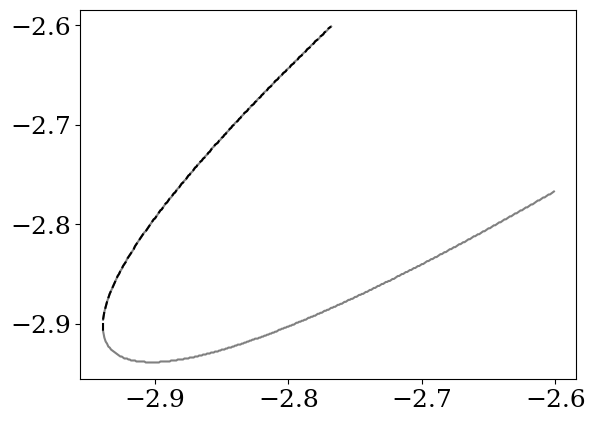

In [174]:
plt.plot(spin_right[:,0], spin_right[:,1], color = "grey")
plt.plot(spin_left[:,0], spin_left[:,1], color = "grey")
plt.plot(spin_right_app[:,0], spin_right_app[:,1], color = "black", linestyle = "--")


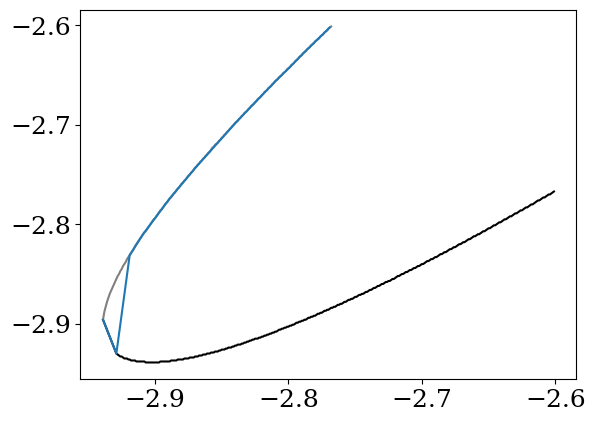

In [93]:
# # interpolation- looks the same as just plot
# # xs = spin_left_app[:,0]
# # ys = spin_left_app[:,1]

# # interp_func = sp.interpolate.interp1d(xs, ys)
# # # x_fine_sr = np.arange(np.min(spin_right_app[:,0]), np.max(spin_right_app[:,0]), .01)
# # x_fine_sl = np.arange(np.min(spin_left_app[:,0]), np.max(spin_left_app[:,0]), .001)

# xs = spin_right_app[:,0]
# ys = spin_right_app[:,1]

# interp_func = sp.interpolate.interp1d(xs, ys)
# x_fine_s = np.arange(np.min(spin_right_app[:,0]), np.max(spin_right_app[:,0]), .01)
# # x_fine_s = np.arange(np.min(spin_left_app[:,0]), np.max(spin_left_app[:,0]), .001)

# newarr = interp_func(x_fine_s)
# plt.plot(spin_left_app[:,0], spin_left_app[:,1], color = "black")
# plt.plot(spin_right[:,0], spin_right[:,1], color = "grey")

# plt.plot(x_fine_s, newarr)

## diagram

<Figure size 640x480 with 0 Axes>

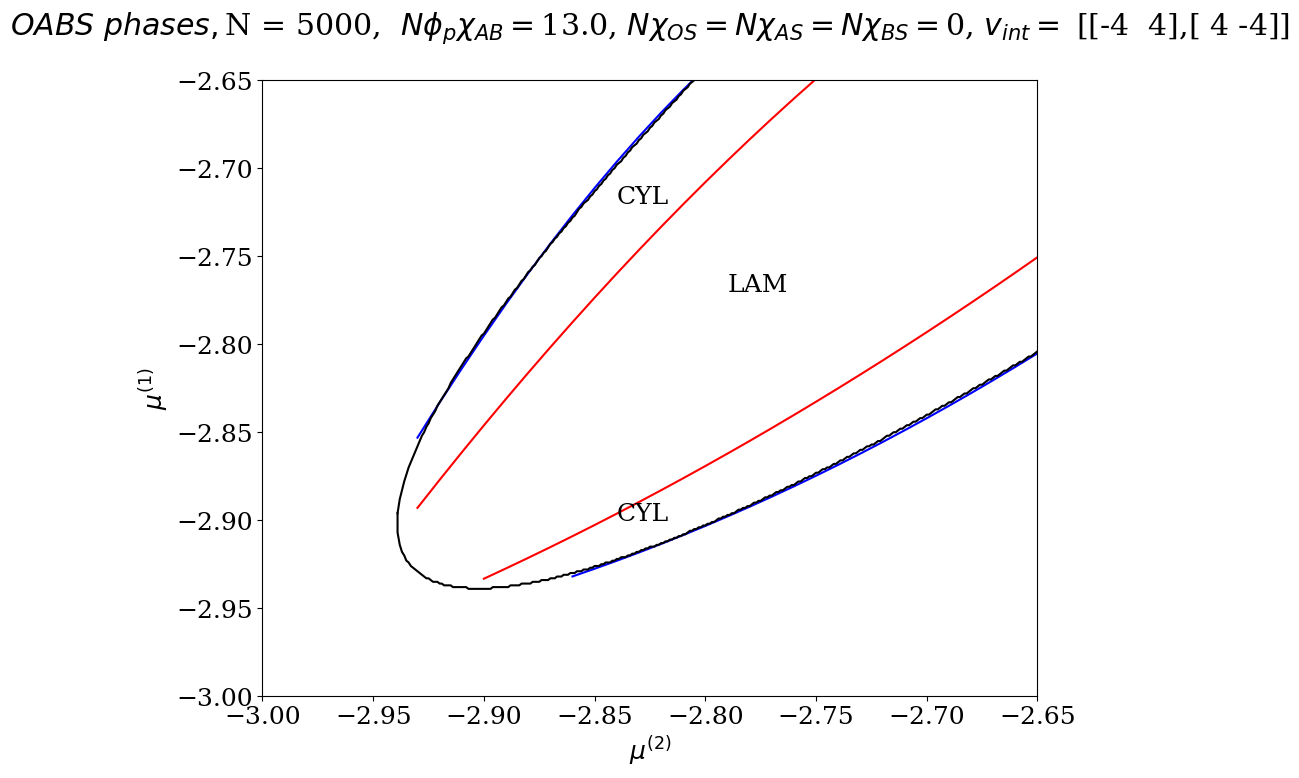

In [129]:
fig = plt.figure()
plt.figure(figsize=(10,8))

font = {'family' : 'serif',
        'weight':'normal',
        'size': 18}
plt.rc('font', **font)

x_fine_ri = np.arange(np.min(cyl_right_inner[:,0]), np.max(cyl_right_inner[:,0]), .01)
x_fine_ro = np.arange(np.min(cyl_right_outer[:,0]), np.max(cyl_right_outer[:,0]), .01)
x_fine_li = np.arange(np.min(cyl_left_inner[:,0]), np.max(cyl_left_inner[:,0]), .01)
x_fine_lo = np.arange(np.min(cyl_left_outer[:,0]), np.max(cyl_left_outer[:,0]), .01)

x_fine_sl = np.arange(np.min(spin_left[:,0]), np.max(spin_left[:,0]), .01)
x_fine_sr = np.arange(np.min(spin_right[:,0]), np.max(spin_right[:,0]), .01)
# x_fine2 = np.arange(-3, -2.6, .001)

plt.plot(x_fine_ri, cyl_ri_coefs[0]*x_fine_ri**2 + cyl_ri_coefs[1]*x_fine_ri + cyl_ri_coefs[2], color = "red")
plt.plot(x_fine_ro, cyl_ro_coefs[0]*x_fine_ro**2 + cyl_ro_coefs[1]*x_fine_ro + cyl_ro_coefs[2], color = "blue")
plt.plot(x_fine_li, cyl_li_coefs[0]*x_fine_li**2 + cyl_li_coefs[1]*x_fine_li + cyl_li_coefs[2], color = "red")
plt.plot(x_fine_lo, cyl_lo_coefs[0]*x_fine_lo**2 + cyl_lo_coefs[1]*x_fine_lo + cyl_lo_coefs[2], color = "blue")

# plt.plot(x_fine_sl, spin_l_coefs[0]*x_fine_sl**2 + spin_l_coefs[1]*x_fine_sl + spin_l_coefs[2], color = "black")
# plt.plot(x_fine_sr, spin_r_coefs[0]*x_fine_sr**2 + spin_r_coefs[1]*x_fine_sr + spin_r_coefs[2], color = "grey")
plt.plot(spin_left_app[:,0], spin_left_app[:,1], color = "black")
plt.plot(spin_right[:,0], spin_right[:,1], color = "black")


plt.ylabel("$\mu^{(1)}$")
plt.xlabel("$\mu^{(2)}$")
plt.text(-2.79, -2.77, "LAM")
plt.text(-2.84, -2.72, "CYL")
plt.text(-2.84, -2.90, "CYL")

plt.title(r"$OABS \ phases, $" +  "N = %s, " % N + " $N \phi_p \chi_{AB} = $" + \
          str(chi_AB_loaded*N*phi_p) \
          + ", $N\chi_{OS} = N\chi_{AS} = N\chi_{BS} =$" + str(N*0)  
          +  ", $v_{int} = $ [" + str(v_int[0]) + "," + str(v_int[1]) + "]" +\
          "\n")

plt.xlim(-3, -2.65)
plt.ylim(-3, -2.65)

# plt.scatter(spin_left[:,0], spin_left[:,1], color = "black")
# plt.scatter(spin_right[:,0], spin_right[:,1], color = "grey")

plt.savefig("finegrain_spinodal.png")

<Figure size 640x480 with 0 Axes>

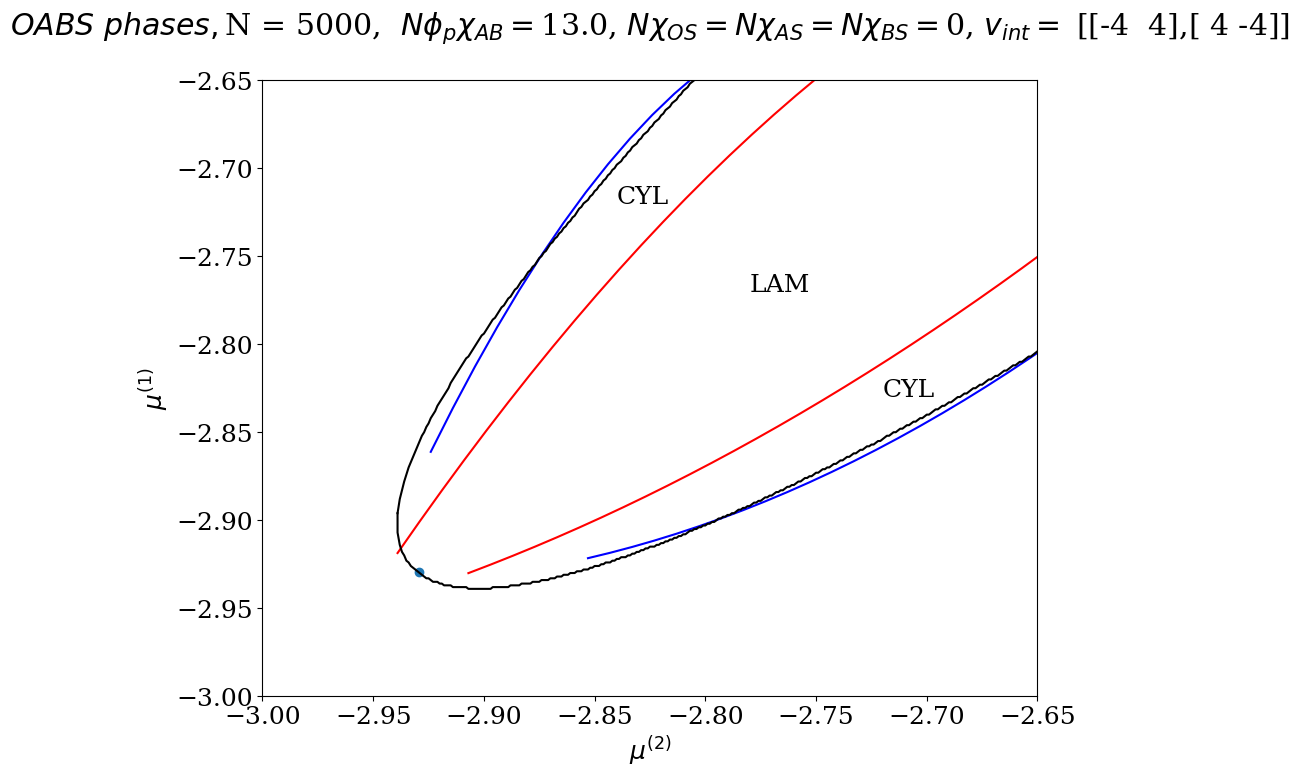

In [268]:
fig = plt.figure()
plt.figure(figsize=(10,8))

font = {'family' : 'serif',
        'weight':'normal',
        'size': 18}
plt.rc('font', **font)

x_fine_ri = np.arange(np.min(cyl_right_inner[:,0])-0.009, np.max(cyl_right_inner[:,0]), .01)
x_fine_ro = np.arange(np.min(cyl_right_outer[:,0])+0.006, np.max(cyl_right_outer[:,0]), .01)
x_fine_li = np.arange(np.min(cyl_left_inner[:,0])-0.007, np.max(cyl_left_inner[:,0]), .01)
x_fine_lo = np.arange(np.min(cyl_left_outer[:,0])+0.007, np.max(cyl_left_outer[:,0]), .01)

x_fine_sl = np.arange(np.min(spin_left[:,0]), np.max(spin_left[:,0]), .01)
x_fine_sr = np.arange(np.min(spin_right[:,0]), np.max(spin_right[:,0]), .01)
# x_fine2 = np.arange(-3, -2.6, .001)

plt.plot(x_fine_ri, cyl_ri_coefs[0]*x_fine_ri**2 + cyl_ri_coefs[1]*x_fine_ri + cyl_ri_coefs[2], color = "red")
plt.plot(x_fine_ro, cyl_ro_coefs[0]*x_fine_ro**2 + cyl_ro_coefs[1]*x_fine_ro + cyl_ro_coefs[2], color = "blue")
plt.plot(x_fine_li, cyl_li_coefs[0]*x_fine_li**2 + cyl_li_coefs[1]*x_fine_li + cyl_li_coefs[2], color = "red")
plt.plot(x_fine_lo, cyl_lo_coefs[0]*x_fine_lo**2 + cyl_lo_coefs[1]*x_fine_lo + cyl_lo_coefs[2], color = "blue")

# plt.plot(x_fine_sl, spin_l_coefs[0]*x_fine_sl**2 + spin_l_coefs[1]*x_fine_sl + spin_l_coefs[2], color = "black")
# plt.plot(x_fine_sr, spin_r_coefs[0]*x_fine_sr**2 + spin_r_coefs[1]*x_fine_sr + spin_r_coefs[2], color = "grey")
plt.plot(spin_left_app[:,0], spin_left_app[:,1], color = "black")
plt.plot(spin_right[:,0], spin_right[:,1], color = "black")


plt.ylabel("$\mu^{(1)}$")
plt.xlabel("$\mu^{(2)}$")
plt.text(-2.78, -2.77, "LAM")
plt.text(-2.84, -2.72, "CYL")
plt.text(-2.72, -2.83, "CYL")

plt.title(r"$OABS \ phases, $" +  "N = %s, " % N + " $N \phi_p \chi_{AB} = $" + \
          str(chi_AB_loaded*N*phi_p) \
          + ", $N\chi_{OS} = N\chi_{AS} = N\chi_{BS} =$" + str(N*0)  
          +  ", $v_{int} = $ [" + str(v_int[0]) + "," + str(v_int[1]) + "]" +\
          "\n")

plt.xlim(-3, -2.65)
plt.ylim(-3, -2.65)

# plt.scatter(spin_left[:,0], spin_left[:,1], color = "black")
# plt.scatter(spin_right[:,0], spin_right[:,1], color = "grey")

plt.savefig("finegrain_spinodal.png")

In [258]:
#appending spinodal center to cyl boundaries to get cleaner curves
center = [-2.9295, -2.9295]

cyl_right_inner_c = np.vstack([center, cyl_right_inner])
cyl_right_outer_c = np.vstack([center, cyl_right_outer])
cyl_left_outer_c = np.vstack([center, cyl_left_outer])
cyl_left_inner_c = np.vstack([center, cyl_left_inner])


Text(0.5, 0, '$\\mu^{(2)}$')

<Figure size 640x480 with 0 Axes>

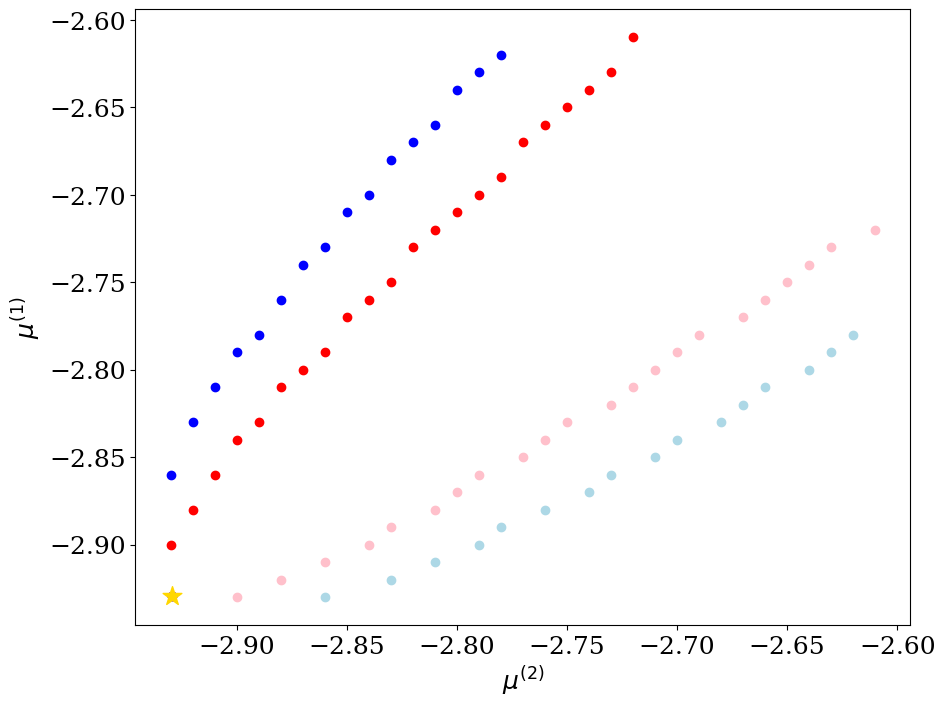

In [296]:
fig = plt.figure()
plt.figure(figsize=(10,8))

font = {'family' : 'serif',
        'weight':'normal',
        'size': 18}
plt.rc('font', **font)

plt.scatter(cyl_right_inner_c[:,0], cyl_right_inner_c[:,1], color = "red")
plt.scatter(cyl_right_outer_c[:,0], cyl_right_outer_c[:,1], color = "blue")

plt.scatter(cyl_left_inner[:,0], cyl_left_inner[:,1], color = "pink")
plt.scatter(cyl_left_outer[:,0], cyl_left_outer[:,1], color = "lightblue")
plt.scatter(-2.9295, -2.9295, marker = "*", color = "gold", s=200)

plt.ylabel("$\mu^{(1)}$")
plt.xlabel("$\mu^{(2)}$")

In [260]:
# cyl_ri_coefs = np.polyfit(cyl_right_inner[:,0], cyl_right_inner[:,1], 2)
# cyl_ro_coefs = np.polyfit(cyl_right_outer[:,0], cyl_right_outer[:,1], 2)

# cyl_li_coefs = np.polyfit(cyl_left_inner[:,0], cyl_left_inner[:,1], 2)
# cyl_lo_coefs = np.polyfit(cyl_left_outer[:,0], cyl_left_outer[:,1], 2)

cyl_ri_coefs = np.polyfit(cyl_right_inner_c[:,0], cyl_right_inner_c[:,1], 2)
cyl_ro_coefs = np.polyfit(cyl_right_outer_c[:,0], cyl_right_outer_c[:,1], 2)

cyl_li_coefs = np.polyfit(cyl_left_inner_c[:,0], cyl_left_inner_c[:,1], 2)
cyl_lo_coefs = np.polyfit(cyl_left_outer_c[:,0], cyl_left_outer_c[:,1], 2)

<Figure size 640x480 with 0 Axes>

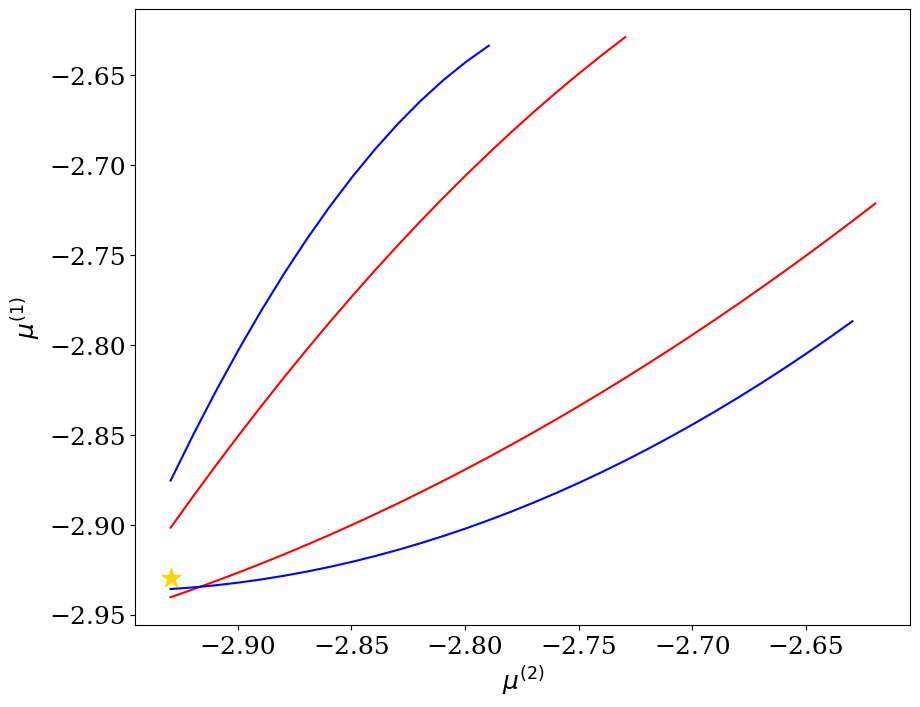

In [298]:
fig = plt.figure()
plt.figure(figsize=(10,8))

font = {'family' : 'serif',
        'weight':'normal',
        'size': 18}
plt.rc('font', **font)
plt.ylabel("$\mu^{(1)}$")
plt.xlabel("$\mu^{(2)}$")

x_fine_ri = np.arange(center[0], np.max(cyl_right_inner[:,0]), .01)
x_fine_ro = np.arange(center[0], np.max(cyl_right_outer[:,0]), .01)
x_fine_li = np.arange(center[0], np.max(cyl_left_inner[:,0]), .01)
x_fine_lo = np.arange(center[0], np.max(cyl_left_outer[:,0]), .01)

x_fine2 = np.arange(-3, -2.6, .001)
plt.plot(x_fine_ri, cyl_ri_coefs[0]*x_fine_ri**2 + cyl_ri_coefs[1]*x_fine_ri + cyl_ri_coefs[2], color = "red")
plt.plot(x_fine_ro, cyl_ro_coefs[0]*x_fine_ro**2 + cyl_ro_coefs[1]*x_fine_ro + cyl_ro_coefs[2], color = "blue")
plt.plot(x_fine_li, cyl_li_coefs[0]*x_fine_li**2 + cyl_li_coefs[1]*x_fine_li + cyl_li_coefs[2], color = "red")
plt.plot(x_fine_lo, cyl_lo_coefs[0]*x_fine_lo**2 + cyl_lo_coefs[1]*x_fine_lo + cyl_lo_coefs[2], color = "blue")
plt.scatter(-2.9295, -2.9295, marker = "*", color = "gold", s=200)

# plt.scatter(xs, ys)

In [266]:
x_fine_ri

array([-2.9295, -2.9195, -2.9095, -2.8995, -2.8895, -2.8795, -2.8695,
       -2.8595, -2.8495, -2.8395, -2.8295, -2.8195, -2.8095, -2.7995,
       -2.7895, -2.7795, -2.7695, -2.7595, -2.7495, -2.7395, -2.7295])

In [226]:
 min(cyl_right_inner[:,0])

-2.9300000000000015

In [228]:
cyl_right_inner[0,0]

-2.9300000000000015

In [230]:
# mu1_intersect = cyl_right_inner[0,0] -0.009#, cyl_right_inner[:,1]
# mu2_intersect = cyl_ri_coefs[0]*mu1_intersect**2 + cyl_ri_coefs[1]*mu1_intersect + cyl_ri_coefs[2]
# # collect all spinodal points where mu1 greater than mu1_intersect, mu2 less than mu2_intersectand less than min(cyl_right_inner[:,0])

# #pre-ppend to cyl_right_inner
# #fit polynomial

In [234]:
# mu2_intersect

-2.907525176453966

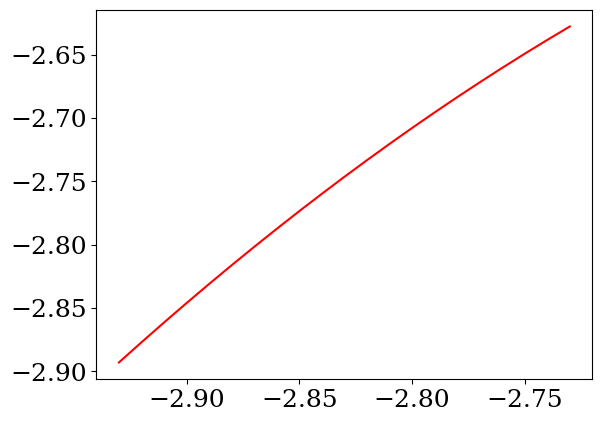

In [224]:
# spin_right_gti = spin_right[np.where(spin_right[:,0] < intersect)]
# plt.plot(spin_right_gti[:,0], spin_right_gti[:,1], color = "grey")
# plt.plot(x_fine_ri, cyl_ri_coefs[0]*x_fine_ri**2 + cyl_ri_coefs[1]*x_fine_ri + cyl_ri_coefs[2], color = "red")


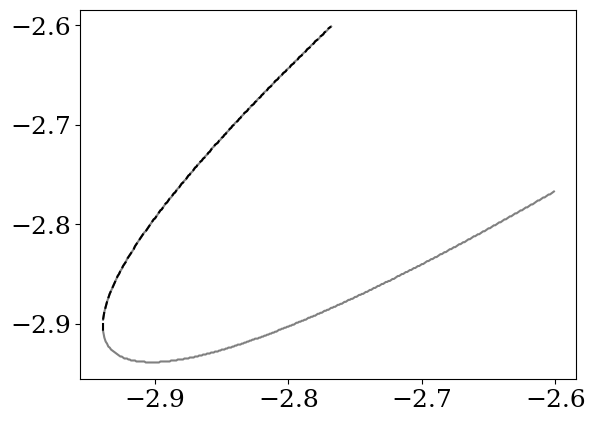

In [176]:
plt.plot(spin_right[:,0], spin_right[:,1], color = "grey")
plt.plot(spin_left[:,0], spin_left[:,1], color = "grey")
plt.plot(spin_right_app[:,0], spin_right_app[:,1], color = "black", linestyle = "--")


<Figure size 640x480 with 0 Axes>

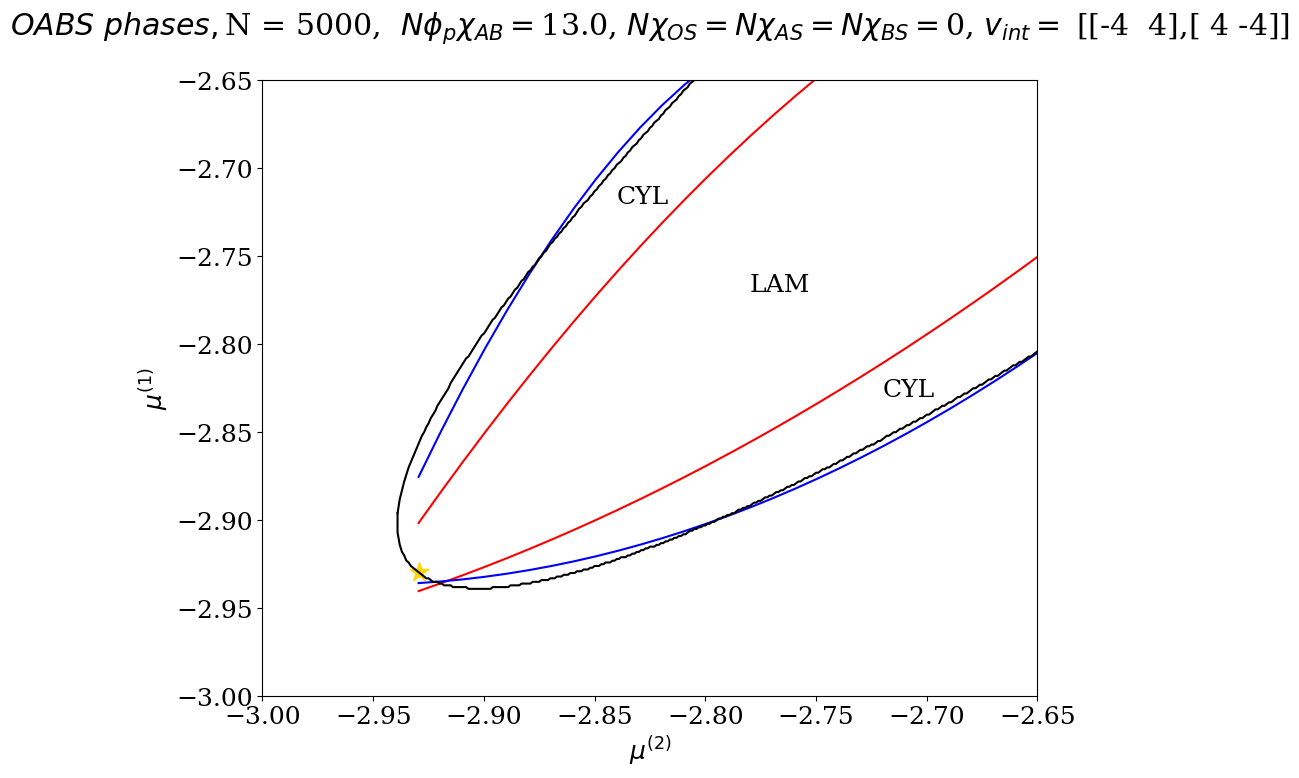

In [300]:
fig = plt.figure()
plt.figure(figsize=(10,8))

font = {'family' : 'serif',
        'weight':'normal',
        'size': 18}
plt.rc('font', **font)

# x_fine_ri = np.arange(np.min(cyl_right_inner[:,0])-0.009, np.max(cyl_right_inner[:,0]), .01)
# x_fine_ro = np.arange(np.min(cyl_right_outer[:,0])+0.006, np.max(cyl_right_outer[:,0]), .01)
# x_fine_li = np.arange(np.min(cyl_left_inner[:,0])-0.007, np.max(cyl_left_inner[:,0]), .01)
# x_fine_lo = np.arange(np.min(cyl_left_outer[:,0])+0.007, np.max(cyl_left_outer[:,0]), .01)

x_fine_ri = np.arange(center[0], np.max(cyl_right_inner[:,0]), .01)
x_fine_ro = np.arange(center[0], np.max(cyl_right_outer[:,0]), .01)
x_fine_li = np.arange(center[0], np.max(cyl_left_inner[:,0]), .01)
x_fine_lo = np.arange(center[0], np.max(cyl_left_outer[:,0]), .01)

x_fine_sl = np.arange(np.min(spin_left[:,0]), np.max(spin_left[:,0]), .01)
x_fine_sr = np.arange(np.min(spin_right[:,0]), np.max(spin_right[:,0]), .01)
# x_fine2 = np.arange(-3, -2.6, .001)

plt.plot(x_fine_ri, cyl_ri_coefs[0]*x_fine_ri**2 + cyl_ri_coefs[1]*x_fine_ri + cyl_ri_coefs[2], color = "red")
plt.plot(x_fine_ro, cyl_ro_coefs[0]*x_fine_ro**2 + cyl_ro_coefs[1]*x_fine_ro + cyl_ro_coefs[2], color = "blue")
plt.plot(x_fine_li, cyl_li_coefs[0]*x_fine_li**2 + cyl_li_coefs[1]*x_fine_li + cyl_li_coefs[2], color = "red")
plt.plot(x_fine_lo, cyl_lo_coefs[0]*x_fine_lo**2 + cyl_lo_coefs[1]*x_fine_lo + cyl_lo_coefs[2], color = "blue")

# plt.plot(x_fine_sl, spin_l_coefs[0]*x_fine_sl**2 + spin_l_coefs[1]*x_fine_sl + spin_l_coefs[2], color = "black")
# plt.plot(x_fine_sr, spin_r_coefs[0]*x_fine_sr**2 + spin_r_coefs[1]*x_fine_sr + spin_r_coefs[2], color = "grey")
plt.plot(spin_left_app[:,0], spin_left_app[:,1], color = "black")
plt.plot(spin_right[:,0], spin_right[:,1], color = "black")

plt.scatter(-2.9295, -2.9295, marker = "*", color = "gold", s=200)
plt.ylabel("$\mu^{(1)}$")
plt.xlabel("$\mu^{(2)}$")
plt.text(-2.78, -2.77, "LAM")
plt.text(-2.84, -2.72, "CYL")
plt.text(-2.72, -2.83, "CYL")

plt.title(r"$OABS \ phases, $" +  "N = %s, " % N + " $N \phi_p \chi_{AB} = $" + \
          str(chi_AB_loaded*N*phi_p) \
          + ", $N\chi_{OS} = N\chi_{AS} = N\chi_{BS} =$" + str(N*0)  
          +  ", $v_{int} = $ [" + str(v_int[0]) + "," + str(v_int[1]) + "]" +\
          "\n")

plt.xlim(-3, -2.65)
plt.ylim(-3, -2.65)

# plt.scatter(spin_left[:,0], spin_left[:,1], color = "black")
# plt.scatter(spin_right[:,0], spin_right[:,1], color = "grey")

plt.savefig("finegrain_spinodal.png")

## misc code

In [745]:
import scipy as sp

In [723]:
# spin_l_coefs = np.polyfit(spin_left[:,0], spin_left[:,1], 2)
spin_l_coefs = np.polyfit(spin_left_app[:,0], spin_left_app[:,1], 2)

spin_r_coefs = np.polyfit(spin_right[:,0], spin_right[:,1], 2)
# spin_r_coefs = np.polyfit(spin_right_app[:,0], spin_right_app[:,1], 2)


(-3.0, -2.65)

<Figure size 640x480 with 0 Axes>

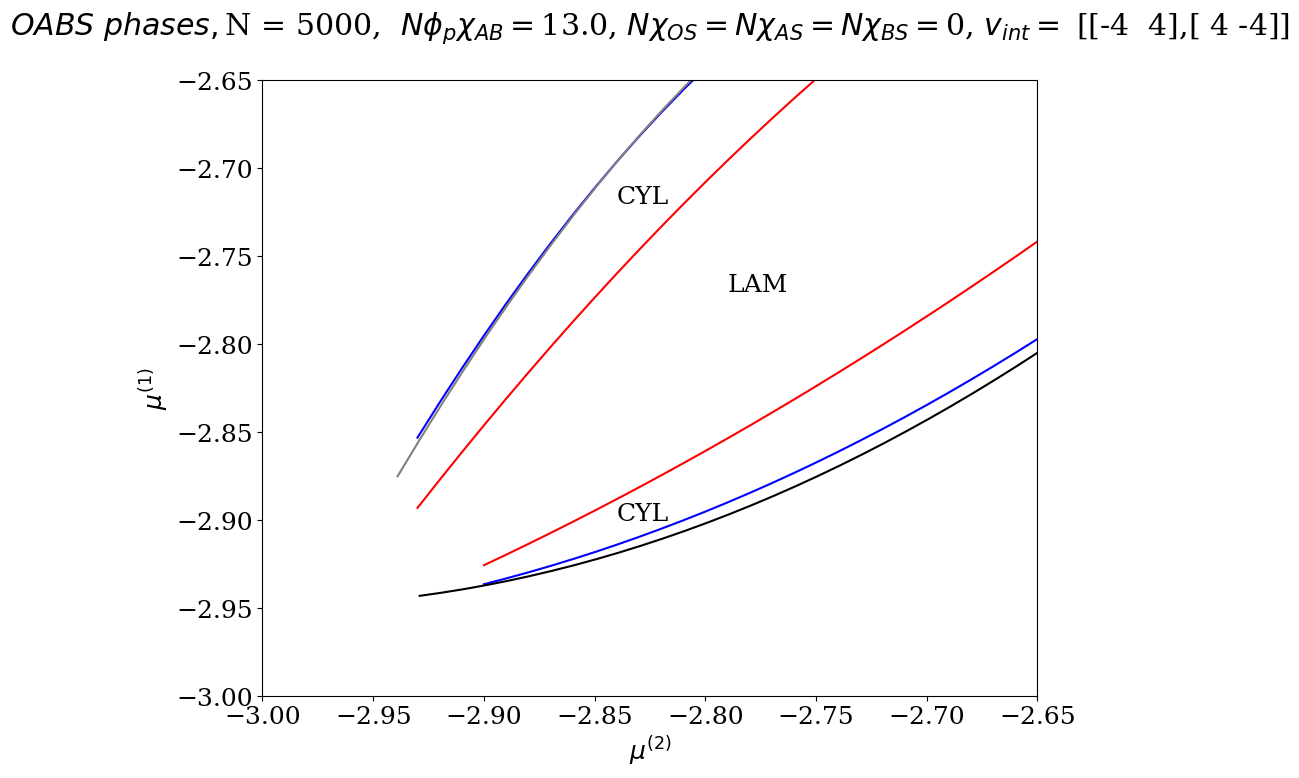

In [725]:
fig = plt.figure()
plt.figure(figsize=(10,8))

font = {'family' : 'serif',
        'weight':'normal',
        'size': 18}
plt.rc('font', **font)

x_fine_ri = np.arange(np.min(cyl_right_inner[:,0]), np.max(cyl_right_inner[:,0]), .01)
x_fine_ro = np.arange(np.min(cyl_right_outer[:,0]), np.max(cyl_right_outer[:,0]), .01)
x_fine_li = np.arange(np.min(cyl_left_inner[:,0]), np.max(cyl_left_inner[:,0]), .01)
x_fine_lo = np.arange(np.min(cyl_left_outer[:,0]), np.max(cyl_left_outer[:,0]), .01)

x_fine_sl = np.arange(np.min(spin_left[:,0]), np.max(spin_left[:,0]), .01)
# x_fine_sr = np.arange(np.min(spin_right[:,0]), np.max(spin_right[:,0]), .01)
x_fine_sr = np.arange(np.min(spin_right_app[:,0]), np.max(spin_right_app[:,0]), .01)

# x_fine2 = np.arange(-3, -2.6, .001)

plt.plot(x_fine_ri, cyl_ri_coefs[0]*x_fine_ri**2 + cyl_ri_coefs[1]*x_fine_ri + cyl_ri_coefs[2], color = "red")
plt.plot(x_fine_ro, cyl_ro_coefs[0]*x_fine_ro**2 + cyl_ro_coefs[1]*x_fine_ro + cyl_ro_coefs[2], color = "blue")
plt.plot(x_fine_li, cyl_li_coefs[0]*x_fine_li**2 + cyl_li_coefs[1]*x_fine_li + cyl_li_coefs[2], color = "red")
plt.plot(x_fine_lo, cyl_lo_coefs[0]*x_fine_lo**2 + cyl_lo_coefs[1]*x_fine_lo + cyl_lo_coefs[2], color = "blue")

plt.plot(x_fine_sl, spin_l_coefs[0]*x_fine_sl**2 + spin_l_coefs[1]*x_fine_sl + spin_l_coefs[2], color = "black")
plt.plot(x_fine_sr, spin_r_coefs[0]*x_fine_sr**2 + spin_r_coefs[1]*x_fine_sr + spin_r_coefs[2], color = "grey")


plt.ylabel("$\mu^{(1)}$")
plt.xlabel("$\mu^{(2)}$")
plt.text(-2.79, -2.77, "LAM")
plt.text(-2.84, -2.72, "CYL")
plt.text(-2.84, -2.90, "CYL")

plt.title(r"$OABS \ phases, $" +  "N = %s, " % N + " $N \phi_p \chi_{AB} = $" + \
          str(chi_AB_loaded*N*phi_p) \
          + ", $N\chi_{OS} = N\chi_{AS} = N\chi_{BS} =$" + str(N*0)  
          +  ", $v_{int} = $ [" + str(v_int[0]) + "," + str(v_int[1]) + "]" +\
          "\n")

plt.xlim(-3, -2.65)
plt.ylim(-3, -2.65)

# plt.scatter(spin_left[:,0], spin_left[:,1], color = "black")
# plt.scatter(spin_right[:,0], spin_right[:,1], color = "grey")

# plt.scatter(xs, ys)

<Figure size 640x480 with 0 Axes>

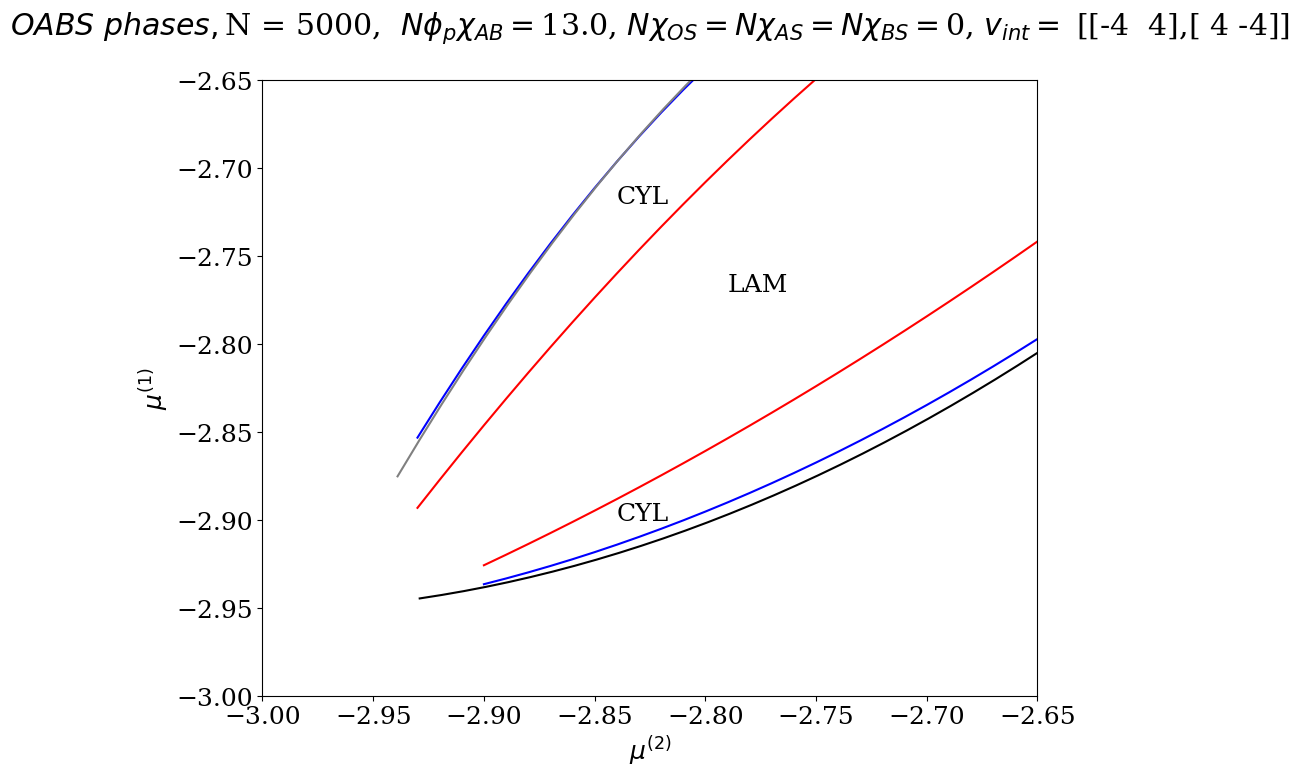

In [671]:
fig = plt.figure()
plt.figure(figsize=(10,8))

font = {'family' : 'serif',
        'weight':'normal',
        'size': 18}
plt.rc('font', **font)

x_fine_ri = np.arange(np.min(cyl_right_inner[:,0]), np.max(cyl_right_inner[:,0]), .01)
x_fine_ro = np.arange(np.min(cyl_right_outer[:,0]), np.max(cyl_right_outer[:,0]), .01)
x_fine_li = np.arange(np.min(cyl_left_inner[:,0]), np.max(cyl_left_inner[:,0]), .01)
x_fine_lo = np.arange(np.min(cyl_left_outer[:,0]), np.max(cyl_left_outer[:,0]), .01)

x_fine_sl = np.arange(np.min(spin_left[:,0]), np.max(spin_left[:,0]), .01)
x_fine_sr = np.arange(np.min(spin_right[:,0]), np.max(spin_right[:,0]), .01)
# x_fine2 = np.arange(-3, -2.6, .001)

plt.plot(x_fine_ri, cyl_ri_coefs[0]*x_fine_ri**2 + cyl_ri_coefs[1]*x_fine_ri + cyl_ri_coefs[2], color = "red")
plt.plot(x_fine_ro, cyl_ro_coefs[0]*x_fine_ro**2 + cyl_ro_coefs[1]*x_fine_ro + cyl_ro_coefs[2], color = "blue")
plt.plot(x_fine_li, cyl_li_coefs[0]*x_fine_li**2 + cyl_li_coefs[1]*x_fine_li + cyl_li_coefs[2], color = "red")
plt.plot(x_fine_lo, cyl_lo_coefs[0]*x_fine_lo**2 + cyl_lo_coefs[1]*x_fine_lo + cyl_lo_coefs[2], color = "blue")

plt.plot(x_fine_sl, spin_l_coefs[0]*x_fine_sl**2 + spin_l_coefs[1]*x_fine_sl + spin_l_coefs[2], color = "black")
plt.plot(x_fine_sr, spin_r_coefs[0]*x_fine_sr**2 + spin_r_coefs[1]*x_fine_sr + spin_r_coefs[2], color = "grey")


plt.ylabel("$\mu^{(1)}$")
plt.xlabel("$\mu^{(2)}$")
plt.text(-2.79, -2.77, "LAM")
plt.text(-2.84, -2.72, "CYL")
plt.text(-2.84, -2.90, "CYL")

plt.title(r"$OABS \ phases, $" +  "N = %s, " % N + " $N \phi_p \chi_{AB} = $" + \
          str(chi_AB_loaded*N*phi_p) \
          + ", $N\chi_{OS} = N\chi_{AS} = N\chi_{BS} =$" + str(N*0)  
          +  ", $v_{int} = $ [" + str(v_int[0]) + "," + str(v_int[1]) + "]" +\
          "\n")

plt.xlim(-3, -2.65)
plt.ylim(-3, -2.65)

# plt.scatter(spin_left[:,0], spin_left[:,1], color = "black")
# plt.scatter(spin_right[:,0], spin_right[:,1], color = "grey")

plt.savefig("finegrain_spinodal.png")

In [ ]:
# increase resolution on spinodal- makes it better?
# if so, start running higher res phase diagram ( parralellize)